Data Exploration

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kundanbedmutha/exam-score-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jp_ms\.cache\kagglehub\datasets\kundanbedmutha\exam-score-prediction-dataset\versions\2


In [4]:
import pandas as pd
import numpy as np      
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
import os
import warnings
warnings.filterwarnings('ignore')

# Set professional plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16

# Color palette for consistent styling
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72', 
    'accent': '#F18F01',
    'success': '#C73E1D',
    'neutral': '#3B3B3B'
}

# Load the CSV file
df = pd.read_csv(os.path.join(path, "Exam_Score_Prediction.csv"))
print("✓ Dataset loaded successfully!")
print(f"✓ Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

✓ Dataset loaded successfully!
✓ Shape: 20,000 rows × 13 columns


In [5]:
## 1. Dataset Overview


In [6]:
# Dataset shape and basic info
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\n📊 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "-" * 60)
print("COLUMN INFORMATION")
print("-" * 60)

# Create a summary dataframe
col_info = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Non-Null Count': df.notna().sum().values,
    'Null Count': df.isna().sum().values,
    'Null %': (df.isna().sum().values / len(df) * 100).round(2),
    'Unique Values': df.nunique().values
})
col_info.index = range(1, len(col_info) + 1)
display(col_info)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\n" + "-" * 60)
print("FEATURE TYPES")
print("-" * 60)
print(f"\n🔢 Numerical Features ({len(numerical_cols)}): {numerical_cols}")
print(f"\n📝 Categorical Features ({len(categorical_cols)}): {categorical_cols}")


DATASET OVERVIEW

📊 Shape: 20,000 rows × 13 columns
💾 Memory Usage: 8.16 MB

------------------------------------------------------------
COLUMN INFORMATION
------------------------------------------------------------


,Column,Data Type,Non-Null Count,Null Count,Null %,Unique Values
1,student_id,int64,20000,0,0.0,20000
2,age,int64,20000,0,0.0,8
3,gender,object,20000,0,0.0,3
4,course,object,20000,0,0.0,7
5,study_hours,float64,20000,0,0.0,784
6,class_attendance,float64,20000,0,0.0,589
7,internet_access,object,20000,0,0.0,2
8,sleep_hours,float64,20000,0,0.0,59
9,sleep_quality,object,20000,0,0.0,3
10,study_method,object,20000,0,0.0,5



------------------------------------------------------------
FEATURE TYPES
------------------------------------------------------------

🔢 Numerical Features (6): ['student_id', 'age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']

📝 Categorical Features (7): ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']


In [7]:
# First and last rows preview
print("=" * 60)
print("DATA PREVIEW")
print("=" * 60)
print("\n📋 First 5 Rows:")
display(df.head())

print("\n📋 Last 5 Rows:")
display(df.tail())


DATA PREVIEW

📋 First 5 Rows:


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7



📋 Last 5 Rows:


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0
19999,20001,20,male,b.sc,7.50,47.9,yes,7.5,poor,coaching,medium,moderate,71.0


## 2. Missing Values Analysis


MISSING VALUES ANALYSIS

✅ No missing values found in the dataset!


,Column,Missing Count,Missing %,Present Count,Present %
1,student_id,0,0.0,20000,100.0
2,age,0,0.0,20000,100.0
3,gender,0,0.0,20000,100.0
4,course,0,0.0,20000,100.0
5,study_hours,0,0.0,20000,100.0
6,class_attendance,0,0.0,20000,100.0
7,internet_access,0,0.0,20000,100.0
8,sleep_hours,0,0.0,20000,100.0
9,sleep_quality,0,0.0,20000,100.0
10,study_method,0,0.0,20000,100.0


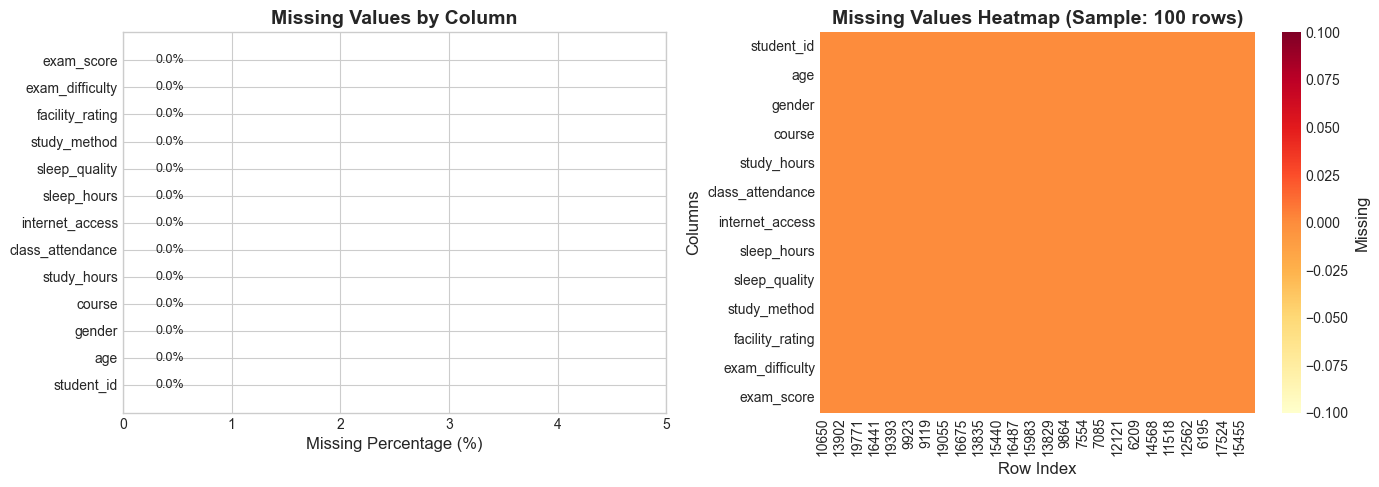


📊 Total Missing Values: 0 (0.00% of all data)


In [8]:
# Missing Values Analysis
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isna().sum().values,
    'Missing %': (df.isna().sum().values / len(df) * 100).round(2),
    'Present Count': df.notna().sum().values,
    'Present %': (df.notna().sum().values / len(df) * 100).round(2)
})
missing_data = missing_data.sort_values('Missing %', ascending=False)
missing_data.index = range(1, len(missing_data) + 1)

# Only show columns with missing values if any
if missing_data['Missing Count'].sum() > 0:
    print("\n⚠️ Columns with Missing Values:")
    display(missing_data[missing_data['Missing Count'] > 0])
else:
    print("\n✅ No missing values found in the dataset!")
    
display(missing_data)

# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot of missing values
ax1 = axes[0]
colors = ['#C73E1D' if x > 0 else '#2E86AB' for x in missing_data['Missing Count'].values]
bars = ax1.barh(missing_data['Column'], missing_data['Missing %'], color=colors)
ax1.set_xlabel('Missing Percentage (%)')
ax1.set_title('Missing Values by Column', fontweight='bold', fontsize=14)
ax1.set_xlim(0, max(missing_data['Missing %'].max() * 1.1, 5))
for i, (bar, pct) in enumerate(zip(bars, missing_data['Missing %'].values)):
    ax1.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2, 
             f'{pct:.1f}%', va='center', fontsize=9)

# Heatmap of missing values (sample if large dataset)
ax2 = axes[1]
sample_size = min(100, len(df))
df_sample = df.sample(sample_size, random_state=42) if len(df) > sample_size else df
sns.heatmap(df_sample.isna().T, cbar=True, cmap='YlOrRd', ax=ax2,
            yticklabels=df.columns, cbar_kws={'label': 'Missing'})
ax2.set_title(f'Missing Values Heatmap (Sample: {sample_size} rows)', fontweight='bold', fontsize=14)
ax2.set_xlabel('Row Index')
ax2.set_ylabel('Columns')

plt.tight_layout()
plt.show()

print(f"\n📊 Total Missing Values: {df.isna().sum().sum():,} ({(df.isna().sum().sum() / df.size * 100):.2f}% of all data)")


## 3. Numerical Features Analysis

For each numerical feature, we display:
- **Summary Statistics**: Mean, median, std, min, max, skewness, kurtosis
- **Histogram with KDE**: Distribution visualization
- **Box Plot**: Outlier detection
- **QQ Plot**: Normality assessment with Shapiro-Wilk test



In [9]:
# Function to analyze numerical features with 4-panel figure
def analyze_numerical_feature(data, column, color='#2E86AB'):
    """
    Create a comprehensive 4-panel analysis for a numerical feature.
    """
    fig = plt.figure(figsize=(14, 10))
    
    # Create grid for subplots
    gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
    
    # Get clean data (remove NaN)
    clean_data = data[column].dropna()
    
    # ============ Panel 1: Summary Statistics (Top-Left) ============
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.axis('off')
    
    # Calculate statistics
    stats_dict = {
        'Count': f'{len(clean_data):,}',
        'Mean': f'{clean_data.mean():.4f}',
        'Median': f'{clean_data.median():.4f}',
        'Std Dev': f'{clean_data.std():.4f}',
        'Min': f'{clean_data.min():.4f}',
        'Max': f'{clean_data.max():.4f}',
        'Range': f'{clean_data.max() - clean_data.min():.4f}',
        'Skewness': f'{clean_data.skew():.4f}',
        'Kurtosis': f'{clean_data.kurtosis():.4f}',
        'Q1 (25%)': f'{clean_data.quantile(0.25):.4f}',
        'Q3 (75%)': f'{clean_data.quantile(0.75):.4f}',
        'IQR': f'{clean_data.quantile(0.75) - clean_data.quantile(0.25):.4f}'
    }
    
    # Create table
    table_data = [[k, v] for k, v in stats_dict.items()]
    table = ax1.table(cellText=table_data, colLabels=['Statistic', 'Value'],
                      loc='center', cellLoc='left',
                      colColours=[color, color])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)
    
    # Style table header
    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(fontweight='bold', color='white')
        cell.set_edgecolor('#cccccc')
    
    ax1.set_title('Summary Statistics', fontweight='bold', fontsize=12, pad=20)
    
    # ============ Panel 2: Histogram with KDE (Top-Right) ============
    ax2 = fig.add_subplot(gs[0, 1])
    sns.histplot(clean_data, kde=True, ax=ax2, color=color, edgecolor='white', alpha=0.7)
    ax2.axvline(clean_data.mean(), color='#C73E1D', linestyle='--', linewidth=2, label=f'Mean: {clean_data.mean():.2f}')
    ax2.axvline(clean_data.median(), color='#F18F01', linestyle='-.', linewidth=2, label=f'Median: {clean_data.median():.2f}')
    ax2.set_title('Distribution (Histogram + KDE)', fontweight='bold', fontsize=12)
    ax2.set_xlabel(column)
    ax2.set_ylabel('Frequency')
    ax2.legend(loc='upper right', fontsize=9)
    
    # ============ Panel 3: Box Plot (Bottom-Left) ============
    ax3 = fig.add_subplot(gs[1, 0])
    bp = ax3.boxplot(clean_data, vert=True, patch_artist=True, widths=0.5)
    bp['boxes'][0].set_facecolor(color)
    bp['boxes'][0].set_alpha(0.7)
    bp['medians'][0].set_color('#C73E1D')
    bp['medians'][0].set_linewidth(2)
    
    # Annotate outliers count
    Q1 = clean_data.quantile(0.25)
    Q3 = clean_data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = clean_data[(clean_data < Q1 - 1.5 * IQR) | (clean_data > Q3 + 1.5 * IQR)]
    
    ax3.set_title('Box Plot', fontweight='bold', fontsize=12)
    ax3.set_ylabel(column)
    ax3.set_xticklabels([column])
    
    # Add outlier annotation
    outlier_text = f'Outliers: {len(outliers)} ({len(outliers)/len(clean_data)*100:.1f}%)'
    ax3.text(0.95, 0.95, outlier_text, transform=ax3.transAxes, fontsize=10,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # ============ Panel 4: QQ Plot (Bottom-Right) ============
    ax4 = fig.add_subplot(gs[1, 1])
    stats.probplot(clean_data, dist="norm", plot=ax4)
    ax4.get_lines()[0].set_markerfacecolor(color)
    ax4.get_lines()[0].set_markeredgecolor(color)
    ax4.get_lines()[0].set_markersize(4)
    ax4.get_lines()[1].set_color('#C73E1D')
    ax4.set_title('Q-Q Plot (Normal Distribution)', fontweight='bold', fontsize=12)
    
    # Shapiro-Wilk test (sample if data is too large)
    sample_for_test = clean_data.sample(min(5000, len(clean_data)), random_state=42) if len(clean_data) > 5000 else clean_data
    try:
        stat, p_value = shapiro(sample_for_test)
        normality = "Normal" if p_value > 0.05 else "Not Normal"
        normality_text = f'Shapiro-Wilk Test\nStatistic: {stat:.4f}\np-value: {p_value:.4e}\nResult: {normality} (α=0.05)'
    except:
        normality_text = 'Shapiro-Wilk Test\nCould not compute'
    
    ax4.text(0.05, 0.95, normality_text, transform=ax4.transAxes, fontsize=9,
             verticalalignment='top', horizontalalignment='left',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    # Main title
    fig.suptitle(f'Numerical Feature Analysis: {column}', fontweight='bold', fontsize=14, y=1.02)
    
    plt.tight_layout()
    plt.show()
    
    return stats_dict


p 

## 4. Categorical Features Analysis

For each categorical feature, we display:
- **Frequency Table**: Counts and percentages for each category
- **Bar Chart**: Visual distribution of categories


In [10]:
# Function to analyze categorical features
def analyze_categorical_feature(data, column, color='#2E86AB'):
    """
    Create a comprehensive analysis for a categorical feature with frequency table and bar chart.
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Get value counts
    value_counts = data[column].value_counts()
    value_pcts = data[column].value_counts(normalize=True) * 100
    
    # ============ Panel 1: Frequency Table (Left) ============
    ax1 = axes[0]
    ax1.axis('off')
    
    # Create frequency table data
    freq_df = pd.DataFrame({
        'Category': value_counts.index,
        'Count': value_counts.values,
        'Percentage': [f'{p:.2f}%' for p in value_pcts.values],
        'Cumulative %': [f'{c:.2f}%' for c in value_pcts.cumsum().values]
    })
    
    # Create table
    table_data = freq_df.values.tolist()
    table = ax1.table(cellText=table_data, 
                      colLabels=['Category', 'Count', 'Percentage', 'Cumulative %'],
                      loc='center', cellLoc='center',
                      colColours=[color]*4)
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)
    
    # Style table
    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(fontweight='bold', color='white')
        cell.set_edgecolor('#cccccc')
    
    ax1.set_title('Frequency Table', fontweight='bold', fontsize=12, pad=20)
    
    # ============ Panel 2: Horizontal Bar Chart (Right) ============
    ax2 = axes[1]
    
    # Sort by count for better visualization
    sorted_idx = value_counts.sort_values().index
    sorted_counts = value_counts[sorted_idx]
    sorted_pcts = value_pcts[sorted_idx]
    
    # Create gradient colors
    n_bars = len(sorted_counts)
    bar_colors = plt.cm.Blues(np.linspace(0.4, 0.9, n_bars))
    
    bars = ax2.barh(range(len(sorted_counts)), sorted_counts.values, color=bar_colors, edgecolor='white')
    ax2.set_yticks(range(len(sorted_counts)))
    ax2.set_yticklabels(sorted_counts.index)
    ax2.set_xlabel('Count')
    ax2.set_title('Distribution Bar Chart', fontweight='bold', fontsize=12)
    
    # Add count and percentage labels on bars
    for i, (bar, count, pct) in enumerate(zip(bars, sorted_counts.values, sorted_pcts.values)):
        ax2.text(bar.get_width() + max(sorted_counts) * 0.02, bar.get_y() + bar.get_height()/2,
                 f'{count:,} ({pct:.1f}%)', va='center', fontsize=9)
    
    # Extend x-axis to fit labels
    ax2.set_xlim(0, max(sorted_counts) * 1.25)
    
    # Add summary stats
    summary_text = f'Total: {len(data[column]):,}\nUnique: {data[column].nunique()}\nMode: {value_counts.index[0]}'
    ax2.text(0.95, 0.05, summary_text, transform=ax2.transAxes, fontsize=10,
             verticalalignment='bottom', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
    
    # Main title
    fig.suptitle(f'Categorical Feature Analysis: {column}', fontweight='bold', fontsize=14, y=1.02)
    
    plt.tight_layout()
    plt.show()
    
    return freq_df


CATEGORICAL FEATURES ANALYSIS

📊 Found 7 categorical features to analyze:

  1. gender (3 unique values)
  2. course (7 unique values)
  3. internet_access (2 unique values)
  4. sleep_quality (3 unique values)
  5. study_method (5 unique values)
  6. facility_rating (3 unique values)
  7. exam_difficulty (3 unique values)

Feature 1/7: gender


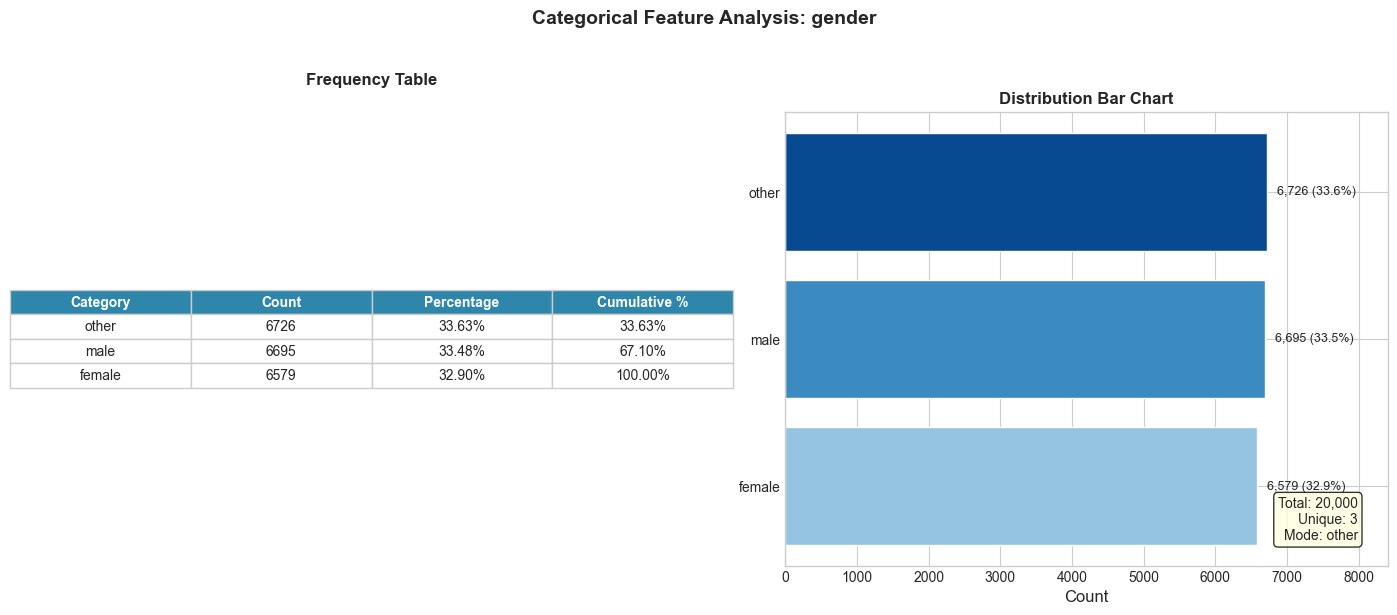


Feature 2/7: course


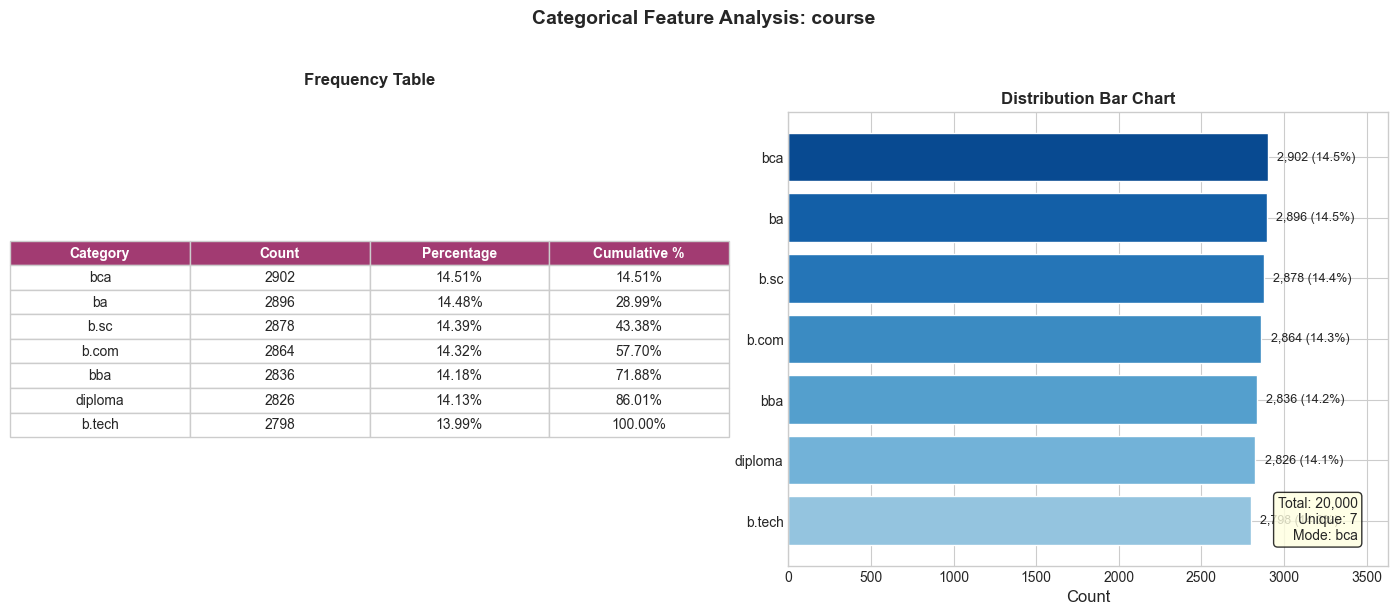


Feature 3/7: internet_access


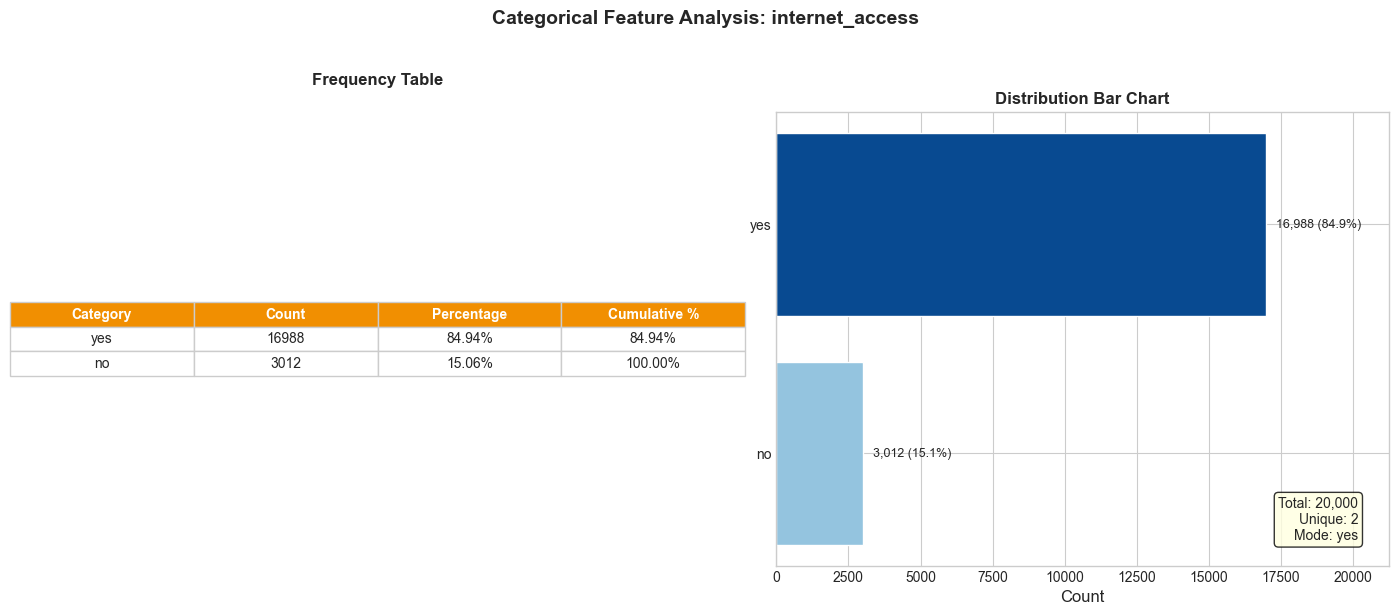


Feature 4/7: sleep_quality


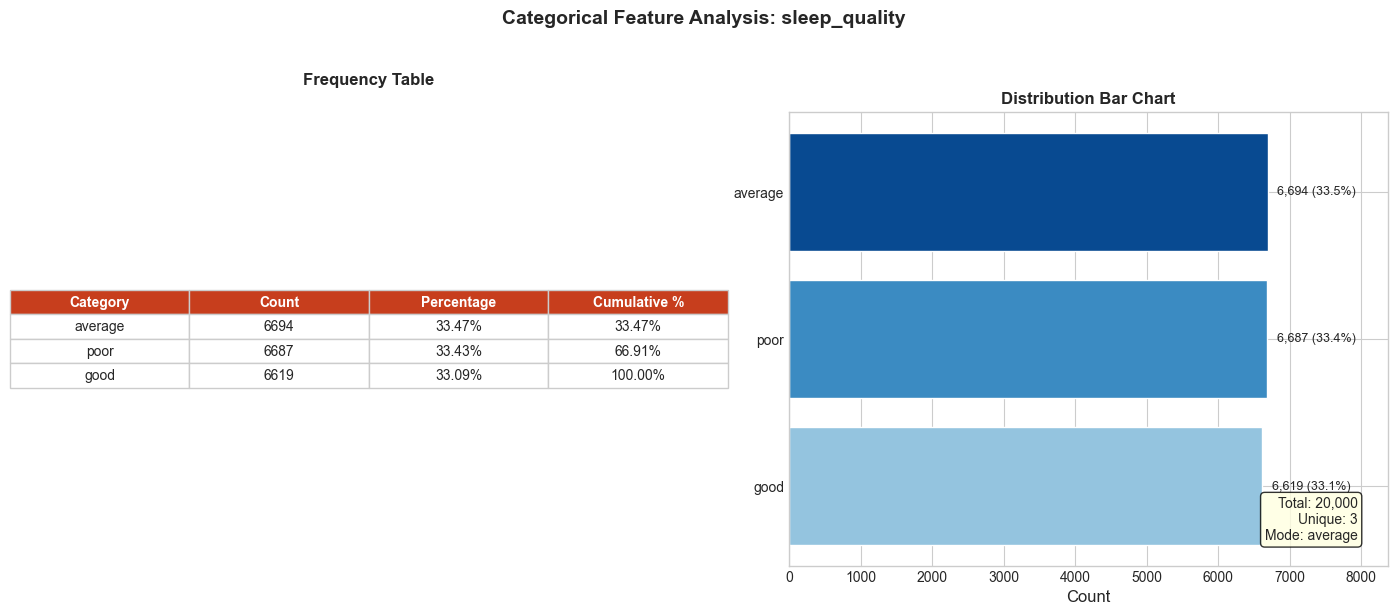


Feature 5/7: study_method


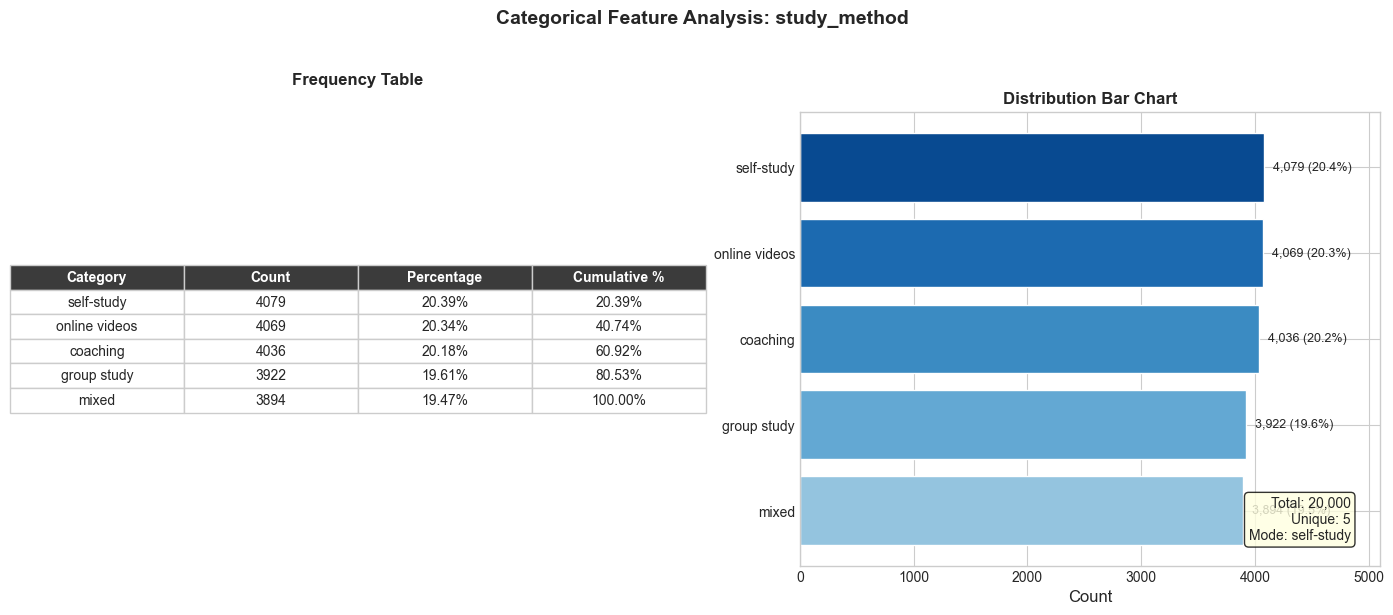


Feature 6/7: facility_rating


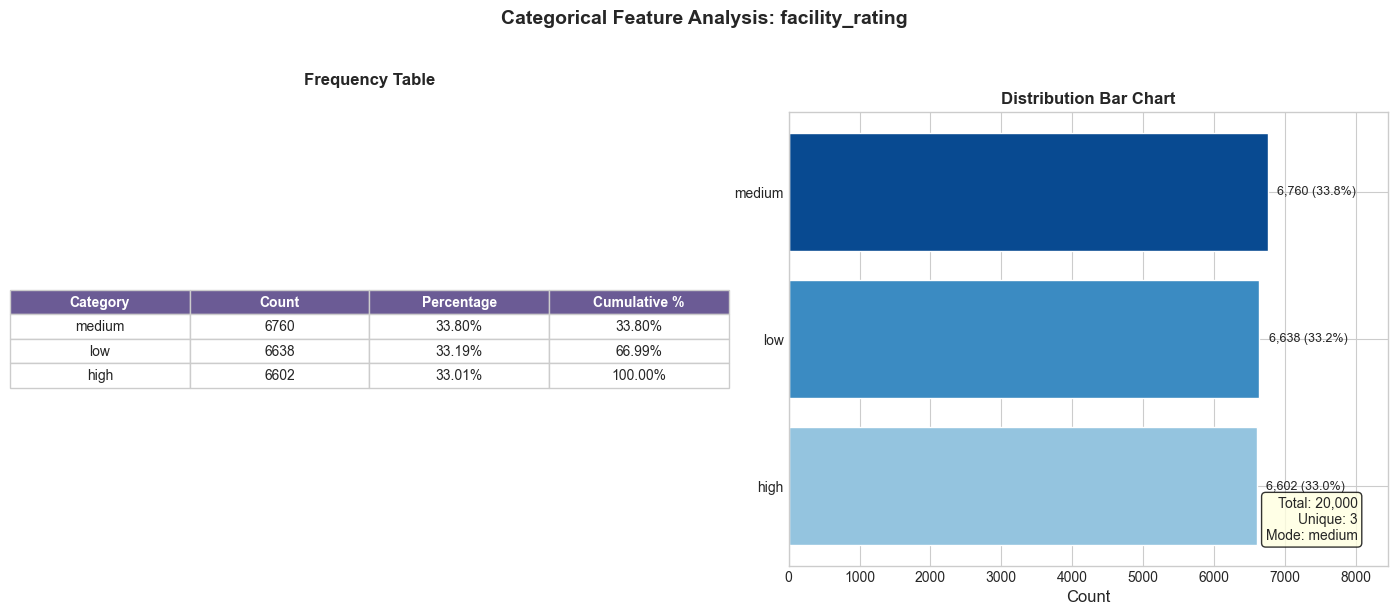


Feature 7/7: exam_difficulty


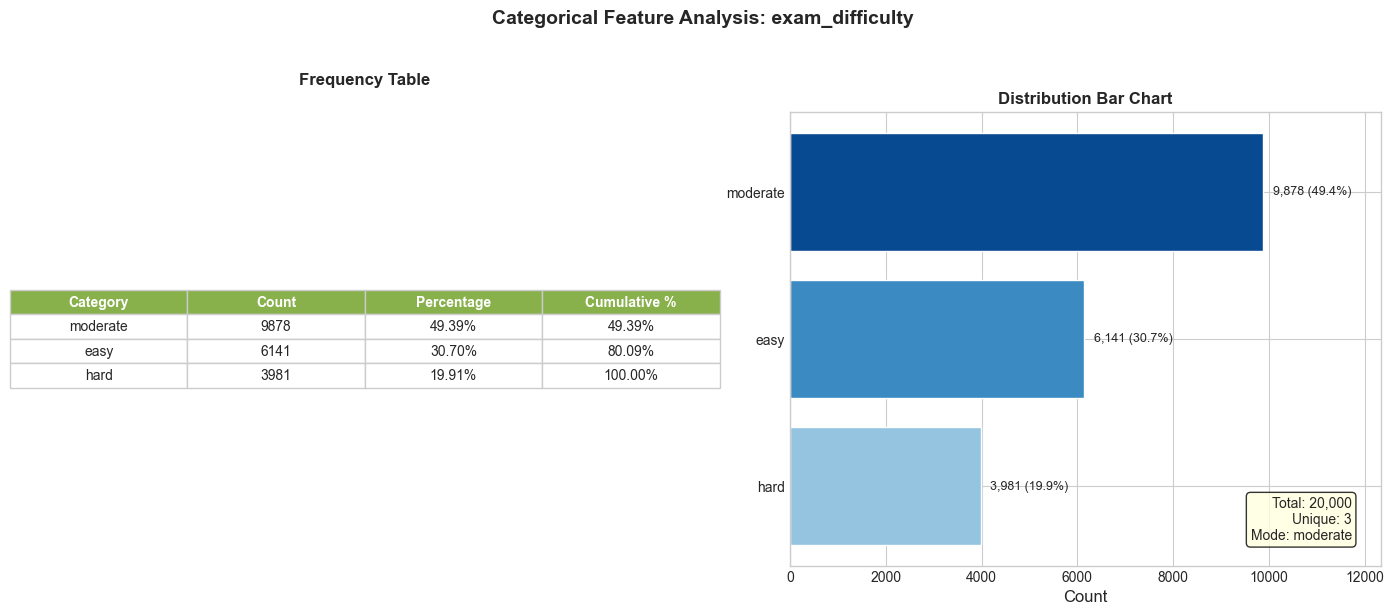

In [11]:
# Analyze all categorical features
print("=" * 60)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 60)

# Get categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if len(categorical_cols) == 0:
    print("\n⚠️ No categorical features found in the dataset.")
else:
    print(f"\n📊 Found {len(categorical_cols)} categorical features to analyze:\n")
    for i, col in enumerate(categorical_cols, 1):
        print(f"  {i}. {col} ({df[col].nunique()} unique values)")
    
    # Color palette for variety
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3B3B3B', '#6B5B95', '#88B04B', '#F7CAC9']
    
    # Analyze each categorical feature
    categorical_stats = {}
    for i, col in enumerate(categorical_cols):
        print(f"\n{'='*60}")
        print(f"Feature {i+1}/{len(categorical_cols)}: {col}")
        print("="*60)
        color = colors[i % len(colors)]
        categorical_stats[col] = analyze_categorical_feature(df, col, color=color)


## 5. Correlation Analysis

Analyzing relationships between numerical features:
- **Correlation Matrix Heatmap**: Visualize all pairwise correlations
- **Top Correlations with Target**: Identify most related features to Exam Score
- **Scatter Plots**: Detailed view of top correlated features vs target


CORRELATION ANALYSIS


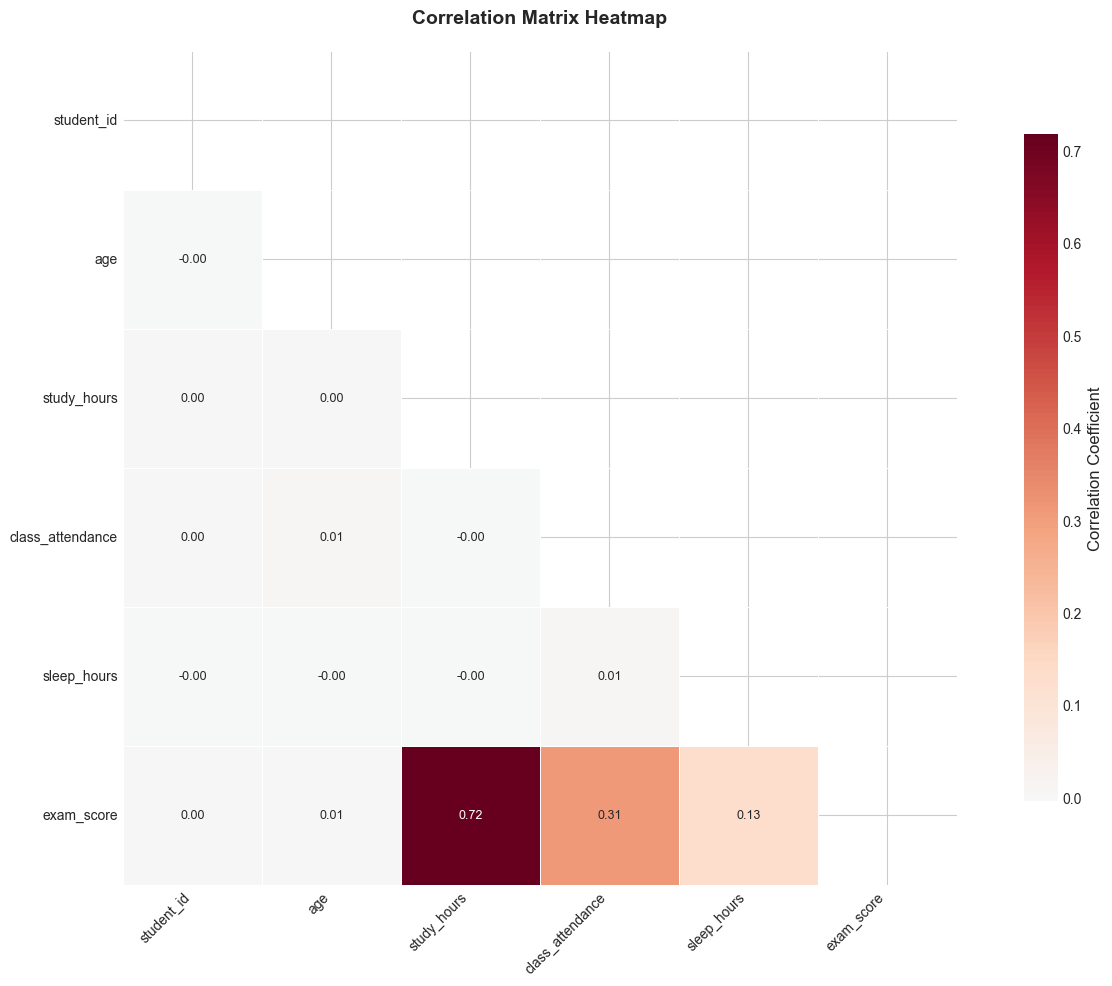


------------------------------------------------------------
TOP CORRELATIONS (Absolute Value)
------------------------------------------------------------

📊 Top 15 Feature Correlations:


,Feature 1,Feature 2,Correlation,Abs Correlation
1,study_hours,exam_score,0.717788,0.717788
2,class_attendance,exam_score,0.308850,0.308850
3,sleep_hours,exam_score,0.133222,0.133222
4,age,class_attendance,0.008449,0.008449
5,class_attendance,sleep_hours,0.007187,0.007187
6,age,exam_score,0.006522,0.006522
7,study_hours,sleep_hours,-0.004533,0.004533
8,student_id,exam_score,0.003269,0.003269
9,age,study_hours,0.002955,0.002955
10,student_id,age,-0.002574,0.002574


In [12]:
# Correlation Analysis
print("=" * 60)
print("CORRELATION ANALYSIS")
print("=" * 60)

# Get numerical columns for correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_cols) < 2:
    print("\n⚠️ Not enough numerical features for correlation analysis.")
else:
    # Calculate correlation matrix
    corr_matrix = df[numerical_cols].corr()
    
    # ============ Correlation Heatmap ============
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Create heatmap
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
                center=0, square=True, linewidths=0.5, ax=ax,
                cbar_kws={'label': 'Correlation Coefficient', 'shrink': 0.8},
                annot_kws={'size': 9})
    
    ax.set_title('Correlation Matrix Heatmap', fontweight='bold', fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # ============ Top Correlations Table ============
    print("\n" + "-" * 60)
    print("TOP CORRELATIONS (Absolute Value)")
    print("-" * 60)
    
    # Get all correlations as pairs
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_pairs.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })
    
    corr_df = pd.DataFrame(corr_pairs)
    corr_df['Abs Correlation'] = corr_df['Correlation'].abs()
    corr_df = corr_df.sort_values('Abs Correlation', ascending=False)
    corr_df.index = range(1, len(corr_df) + 1)
    
    print("\n📊 Top 15 Feature Correlations:")
    display(corr_df.head(15))


TARGET VARIABLE CORRELATIONS

🎯 Identified Target Variable: exam_score

📊 Correlations with exam_score:


,Feature,Correlation,Abs Correlation,Strength
1,study_hours,0.717788,0.717788,Very Strong
2,class_attendance,0.308850,0.308850,Moderate
3,sleep_hours,0.133222,0.133222,Weak
4,age,0.006522,0.006522,Weak
5,student_id,0.003269,0.003269,Weak


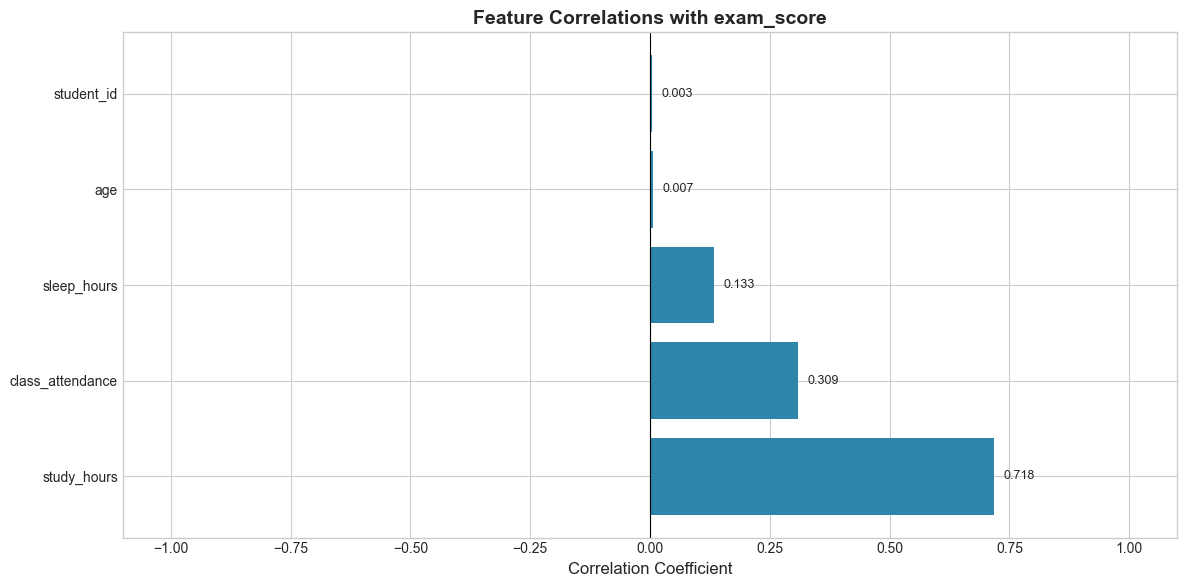


SCATTER PLOTS: Top 4 Correlated Features vs exam_score


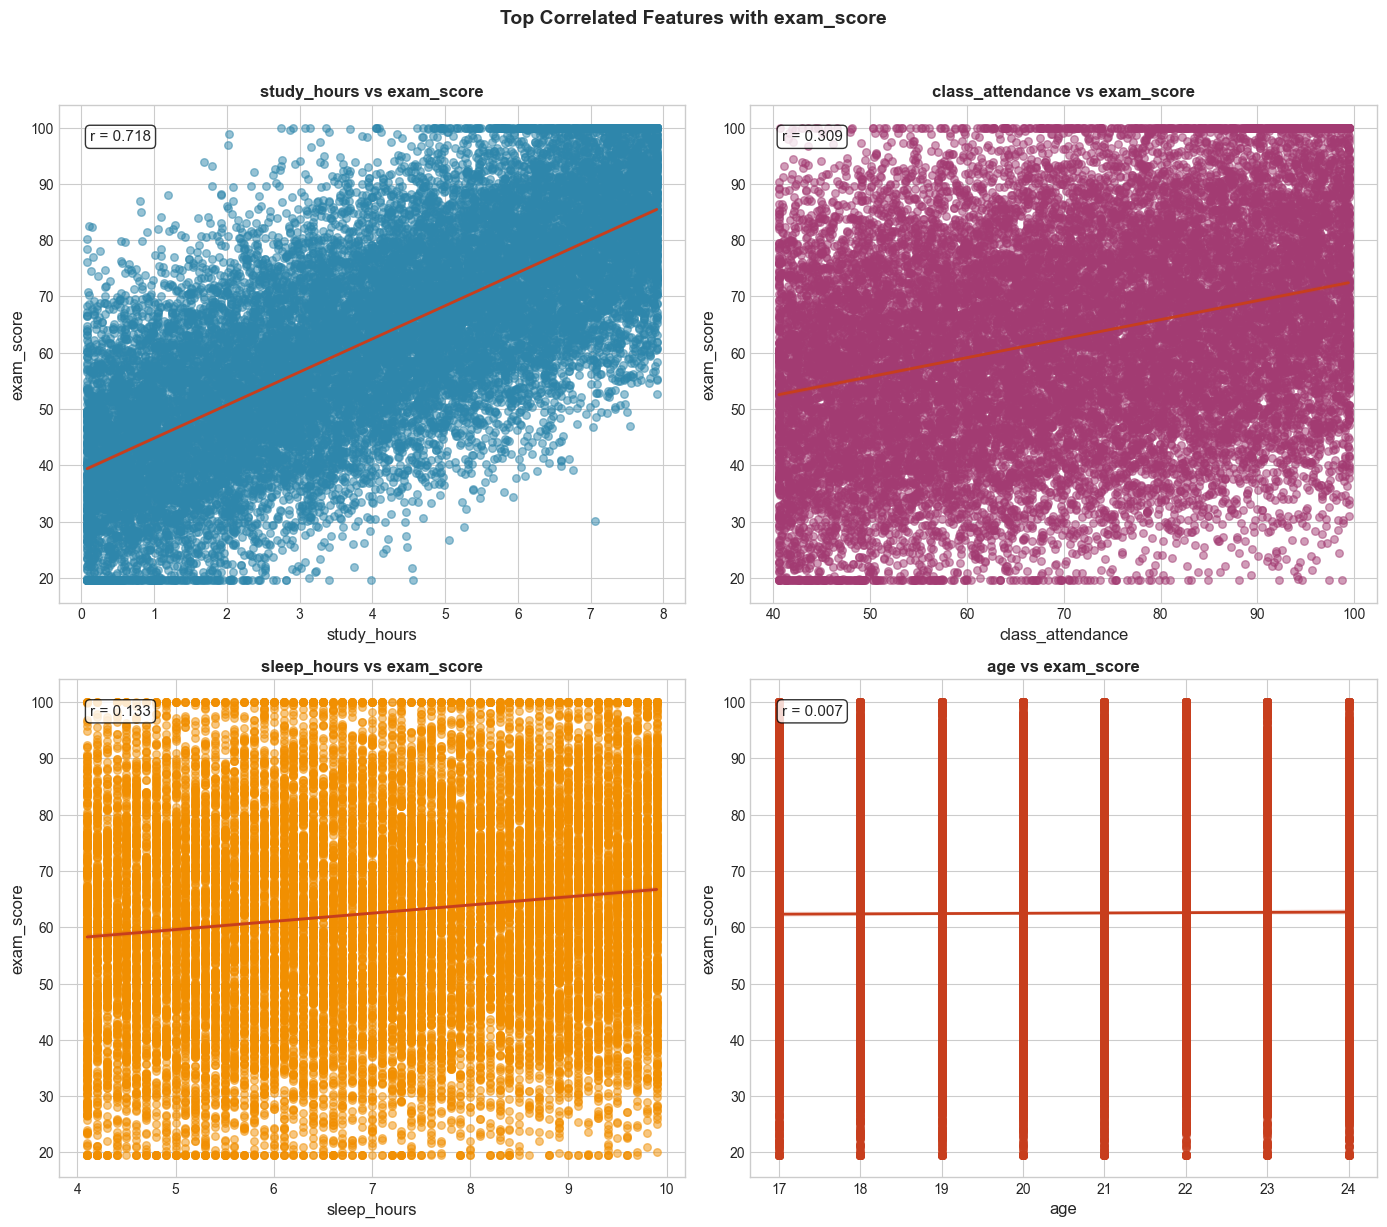

In [13]:
# Find and analyze target variable correlations
print("=" * 60)
print("TARGET VARIABLE CORRELATIONS")
print("=" * 60)

# Try to find the target variable (Exam Score related)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
target_candidates = [col for col in numerical_cols if 'score' in col.lower() or 'exam' in col.lower() or 'grade' in col.lower()]

if len(target_candidates) > 0:
    target_col = target_candidates[0]
    print(f"\n🎯 Identified Target Variable: {target_col}")
else:
    # Use the last numerical column as target
    target_col = numerical_cols[-1] if numerical_cols else None
    print(f"\n🎯 Using last numerical column as target: {target_col}")

if target_col and len(numerical_cols) > 1:
    # Get correlations with target
    target_corr = corr_matrix[target_col].drop(target_col).sort_values(key=abs, ascending=False)
    
    # Display correlations with target
    target_corr_df = pd.DataFrame({
        'Feature': target_corr.index,
        'Correlation': target_corr.values,
        'Abs Correlation': np.abs(target_corr.values),
        'Strength': pd.cut(np.abs(target_corr.values), 
                          bins=[0, 0.3, 0.5, 0.7, 1.0],
                          labels=['Weak', 'Moderate', 'Strong', 'Very Strong'])
    })
    target_corr_df.index = range(1, len(target_corr_df) + 1)
    
    print(f"\n📊 Correlations with {target_col}:")
    display(target_corr_df)
    
    # Visualize correlations with target
    fig, ax = plt.subplots(figsize=(12, 6))
    colors = ['#C73E1D' if x < 0 else '#2E86AB' for x in target_corr.values]
    bars = ax.barh(target_corr.index, target_corr.values, color=colors)
    ax.axvline(x=0, color='black', linewidth=0.8)
    ax.set_xlabel('Correlation Coefficient')
    ax.set_title(f'Feature Correlations with {target_col}', fontweight='bold', fontsize=14)
    
    # Add correlation values on bars
    for bar, corr_val in zip(bars, target_corr.values):
        x_pos = bar.get_width() + 0.02 if bar.get_width() >= 0 else bar.get_width() - 0.08
        ax.text(x_pos, bar.get_y() + bar.get_height()/2, f'{corr_val:.3f}', 
                va='center', fontsize=9)
    
    ax.set_xlim(-1.1, 1.1)
    plt.tight_layout()
    plt.show()
    
    # ============ Scatter plots for top correlated features ============
    top_features = target_corr.head(4).index.tolist()
    
    if len(top_features) > 0:
        print(f"\n{'='*60}")
        print(f"SCATTER PLOTS: Top {len(top_features)} Correlated Features vs {target_col}")
        print("="*60)
        
        n_plots = min(4, len(top_features))
        fig, axes = plt.subplots(2, 2, figsize=(14, 12))
        axes = axes.flatten()
        
        colors_scatter = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
        
        for i, feature in enumerate(top_features[:n_plots]):
            ax = axes[i]
            
            # Scatter plot with regression line
            sns.regplot(data=df, x=feature, y=target_col, ax=ax, 
                       scatter_kws={'alpha': 0.5, 'color': colors_scatter[i], 's': 30},
                       line_kws={'color': '#C73E1D', 'linewidth': 2})
            
            # Add correlation annotation
            corr_val = target_corr[feature]
            ax.text(0.05, 0.95, f'r = {corr_val:.3f}', transform=ax.transAxes,
                   fontsize=11, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            ax.set_title(f'{feature} vs {target_col}', fontweight='bold', fontsize=12)
            ax.set_xlabel(feature)
            ax.set_ylabel(target_col)
        
        # Hide unused subplots
        for j in range(n_plots, 4):
            axes[j].set_visible(False)
        
        plt.suptitle(f'Top Correlated Features with {target_col}', fontweight='bold', fontsize=14, y=1.02)
        plt.tight_layout()
        plt.show()
else:
    print("\n⚠️ Could not identify target variable or not enough features for correlation analysis.")


## 6. Target Variable Deep Dive

Detailed analysis of the Exam Score (target variable):
- **Distribution Analysis**: Comprehensive look at the target variable
- **Group Comparisons**: Mean exam score by categorical features
by   


TARGET VARIABLE DEEP DIVE

🎯 Target Variable: exam_score


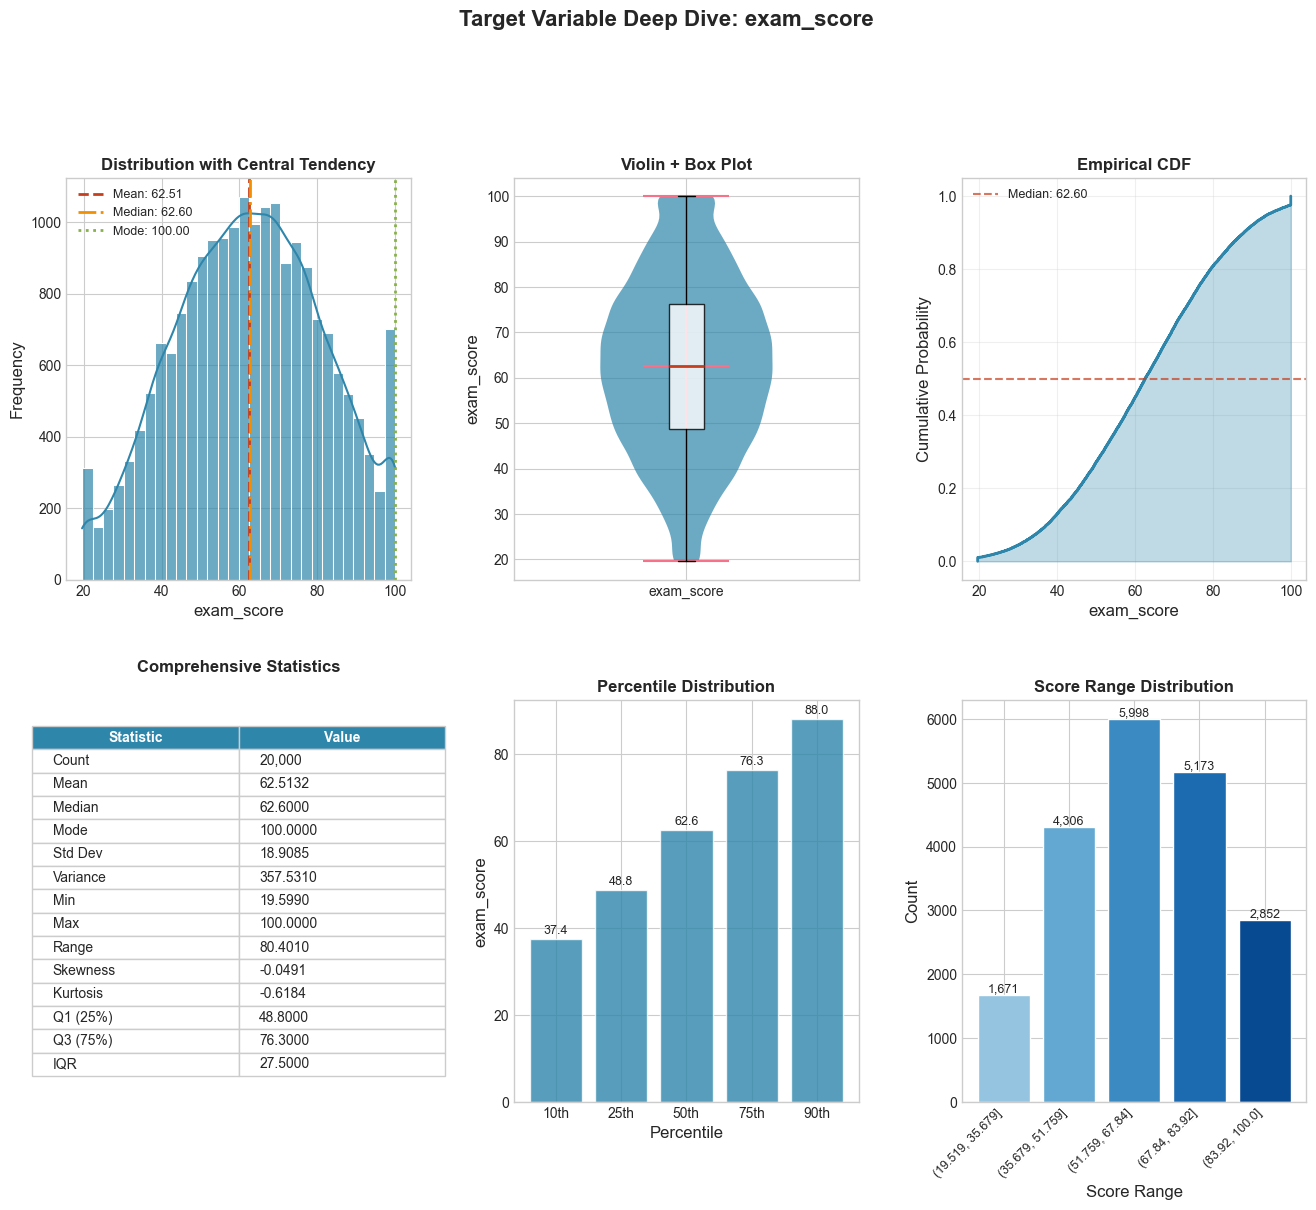

In [14]:
# Target Variable Deep Dive
print("=" * 60)
print("TARGET VARIABLE DEEP DIVE")
print("=" * 60)

# Find the target variable
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
target_candidates = [col for col in numerical_cols if 'score' in col.lower() or 'exam' in col.lower() or 'grade' in col.lower()]

if len(target_candidates) > 0:
    target_col = target_candidates[0]
else:
    target_col = numerical_cols[-1] if numerical_cols else None

if target_col:
    print(f"\n🎯 Target Variable: {target_col}")
    
    # ============ Detailed Distribution Analysis ============
    fig = plt.figure(figsize=(16, 12))
    gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)
    
    target_data = df[target_col].dropna()
    
    # Panel 1: Histogram with multiple overlays
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(target_data, kde=True, ax=ax1, color='#2E86AB', edgecolor='white', alpha=0.7, bins=30)
    ax1.axvline(target_data.mean(), color='#C73E1D', linestyle='--', linewidth=2, label=f'Mean: {target_data.mean():.2f}')
    ax1.axvline(target_data.median(), color='#F18F01', linestyle='-.', linewidth=2, label=f'Median: {target_data.median():.2f}')
    ax1.axvline(target_data.mode().iloc[0] if len(target_data.mode()) > 0 else target_data.mean(), 
                color='#88B04B', linestyle=':', linewidth=2, label=f'Mode: {target_data.mode().iloc[0]:.2f}' if len(target_data.mode()) > 0 else 'Mode: N/A')
    ax1.set_title('Distribution with Central Tendency', fontweight='bold', fontsize=12)
    ax1.set_xlabel(target_col)
    ax1.set_ylabel('Frequency')
    ax1.legend(fontsize=9)
    
    # Panel 2: Box and Violin plot
    ax2 = fig.add_subplot(gs[0, 1])
    parts = ax2.violinplot(target_data, positions=[0], showmeans=True, showmedians=True)
    parts['bodies'][0].set_facecolor('#2E86AB')
    parts['bodies'][0].set_alpha(0.7)
    ax2.boxplot(target_data, positions=[0], widths=0.1, patch_artist=True,
                boxprops=dict(facecolor='white', alpha=0.8),
                medianprops=dict(color='#C73E1D', linewidth=2))
    ax2.set_title('Violin + Box Plot', fontweight='bold', fontsize=12)
    ax2.set_ylabel(target_col)
    ax2.set_xticks([0])
    ax2.set_xticklabels([target_col])
    
    # Panel 3: ECDF (Empirical Cumulative Distribution)
    ax3 = fig.add_subplot(gs[0, 2])
    sorted_data = np.sort(target_data)
    ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ax3.plot(sorted_data, ecdf, color='#2E86AB', linewidth=2)
    ax3.fill_between(sorted_data, ecdf, alpha=0.3, color='#2E86AB')
    ax3.axhline(0.5, color='#C73E1D', linestyle='--', alpha=0.7, label=f'Median: {target_data.median():.2f}')
    ax3.set_title('Empirical CDF', fontweight='bold', fontsize=12)
    ax3.set_xlabel(target_col)
    ax3.set_ylabel('Cumulative Probability')
    ax3.legend(fontsize=9)
    ax3.grid(True, alpha=0.3)
    
    # Panel 4: Summary Statistics Table
    ax4 = fig.add_subplot(gs[1, 0])
    ax4.axis('off')
    
    stats_dict = {
        'Count': f'{len(target_data):,}',
        'Mean': f'{target_data.mean():.4f}',
        'Median': f'{target_data.median():.4f}',
        'Mode': f'{target_data.mode().iloc[0]:.4f}' if len(target_data.mode()) > 0 else 'N/A',
        'Std Dev': f'{target_data.std():.4f}',
        'Variance': f'{target_data.var():.4f}',
        'Min': f'{target_data.min():.4f}',
        'Max': f'{target_data.max():.4f}',
        'Range': f'{target_data.max() - target_data.min():.4f}',
        'Skewness': f'{target_data.skew():.4f}',
        'Kurtosis': f'{target_data.kurtosis():.4f}',
        'Q1 (25%)': f'{target_data.quantile(0.25):.4f}',
        'Q3 (75%)': f'{target_data.quantile(0.75):.4f}',
        'IQR': f'{target_data.quantile(0.75) - target_data.quantile(0.25):.4f}'
    }
    
    table_data = [[k, v] for k, v in stats_dict.items()]
    table = ax4.table(cellText=table_data, colLabels=['Statistic', 'Value'],
                      loc='center', cellLoc='left',
                      colColours=['#2E86AB', '#2E86AB'])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.4)
    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(fontweight='bold', color='white')
        cell.set_edgecolor('#cccccc')
    ax4.set_title('Comprehensive Statistics', fontweight='bold', fontsize=12, pad=20)
    
    # Panel 5: Percentile Distribution
    ax5 = fig.add_subplot(gs[1, 1])
    percentiles = [10, 25, 50, 75, 90]
    percentile_values = [target_data.quantile(p/100) for p in percentiles]
    bars = ax5.bar([f'{p}th' for p in percentiles], percentile_values, color='#2E86AB', edgecolor='white', alpha=0.8)
    ax5.set_title('Percentile Distribution', fontweight='bold', fontsize=12)
    ax5.set_xlabel('Percentile')
    ax5.set_ylabel(target_col)
    for bar, val in zip(bars, percentile_values):
        ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 f'{val:.1f}', ha='center', va='bottom', fontsize=9)
    
    # Panel 6: Score Distribution Bins
    ax6 = fig.add_subplot(gs[1, 2])
    # Create score bins
    bins = pd.cut(target_data, bins=5)
    bin_counts = bins.value_counts().sort_index()
    colors_bins = plt.cm.Blues(np.linspace(0.4, 0.9, len(bin_counts)))
    bars = ax6.bar(range(len(bin_counts)), bin_counts.values, color=colors_bins, edgecolor='white')
    ax6.set_xticks(range(len(bin_counts)))
    ax6.set_xticklabels([str(interval) for interval in bin_counts.index], rotation=45, ha='right', fontsize=9)
    ax6.set_title('Score Range Distribution', fontweight='bold', fontsize=12)
    ax6.set_xlabel('Score Range')
    ax6.set_ylabel('Count')
    for bar, count in zip(bars, bin_counts.values):
        ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                 f'{count:,}', ha='center', va='bottom', fontsize=9)
    
    fig.suptitle(f'Target Variable Deep Dive: {target_col}', fontweight='bold', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ Could not identify target variable.")


GROUP COMPARISONS: TARGET BY CATEGORICAL FEATURES

🎯 Comparing exam_score across categorical features



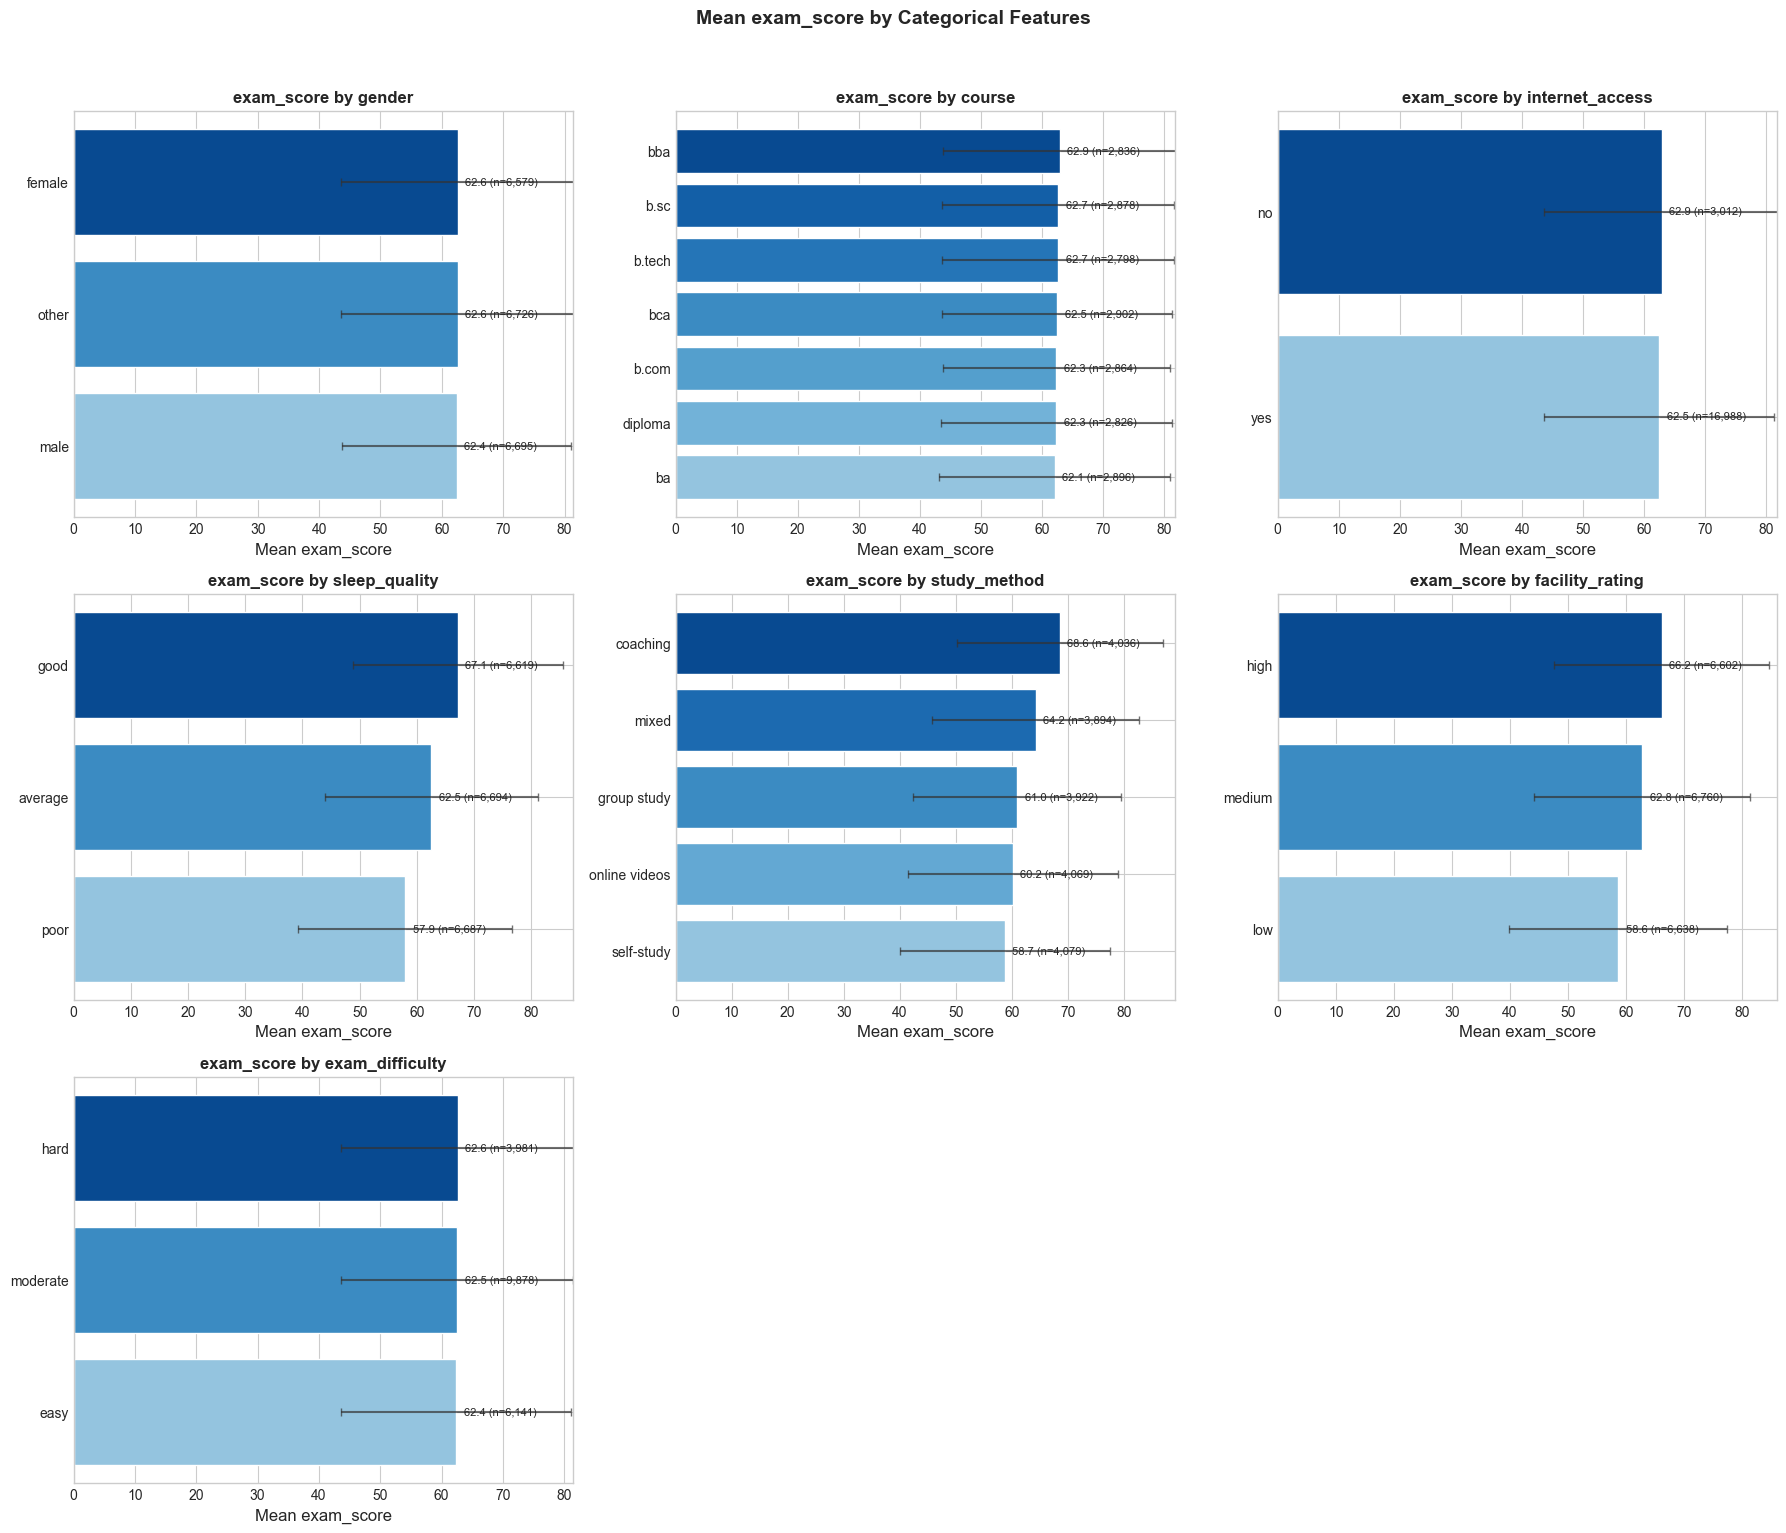


------------------------------------------------------------
SUMMARY: Mean Target by Categories
------------------------------------------------------------

📊 gender:


,Mean,Std,Min,Max,Count
gender,,,,,
female,62.58,19.06,19.6,100.0,6579
other,62.56,18.99,19.6,100.0,6726
male,62.40,18.68,19.6,100.0,6695



📊 course:


,Mean,Std,Min,Max,Count
course,,,,,
bba,62.93,19.10,19.6,100.0,2836
b.sc,62.72,19.01,19.6,100.0,2878
b.tech,62.65,19.00,19.6,100.0,2798
bca,62.52,18.84,19.6,100.0,2902
b.com,62.33,18.61,19.6,100.0,2864
diploma,62.33,18.93,19.6,100.0,2826
ba,62.11,18.89,19.6,100.0,2896



📊 internet_access:


,Mean,Std,Min,Max,Count
internet_access,,,,,
no,62.86,19.20,19.6,100.0,3012
yes,62.45,18.86,19.6,100.0,16988



📊 sleep_quality:


,Mean,Std,Min,Max,Count
sleep_quality,,,,,
good,67.14,18.33,19.6,100.0,6619
average,62.53,18.60,19.6,100.0,6694
poor,57.92,18.66,19.6,100.0,6687



📊 study_method:


,Mean,Std,Min,Max,Count
study_method,,,,,
coaching,68.55,18.42,19.6,100.0,4036
mixed,64.24,18.42,19.6,100.0,3894
group study,60.97,18.53,19.6,100.0,3922
online videos,60.15,18.75,19.6,100.0,4069
self-study,58.73,18.77,19.6,100.0,4079



📊 facility_rating:


,Mean,Std,Min,Max,Count
facility_rating,,,,,
high,66.17,18.55,19.6,100.0,6602
medium,62.79,18.62,19.6,100.0,6760
low,58.59,18.80,19.6,100.0,6638



📊 exam_difficulty:


,Mean,Std,Min,Max,Count
exam_difficulty,,,,,
hard,62.63,19.03,19.6,100.0,3981
moderate,62.55,18.93,19.6,100.0,9878
easy,62.38,18.80,19.6,100.0,6141



END OF EXPLORATORY DATA ANALYSIS


In [15]:
# Group Comparisons: Mean Exam Score by Categorical Features
print("=" * 60)
print("GROUP COMPARISONS: TARGET BY CATEGORICAL FEATURES")
print("=" * 60)

# Get categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Find target variable
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
target_candidates = [col for col in numerical_cols if 'score' in col.lower() or 'exam' in col.lower() or 'grade' in col.lower()]
target_col = target_candidates[0] if len(target_candidates) > 0 else (numerical_cols[-1] if numerical_cols else None)

if target_col and len(categorical_cols) > 0:
    print(f"\n🎯 Comparing {target_col} across categorical features\n")
    
    # Limit to categorical columns with reasonable number of categories
    valid_cat_cols = [col for col in categorical_cols if df[col].nunique() <= 15]
    
    if len(valid_cat_cols) > 0:
        # Calculate number of plots needed
        n_cols = min(3, len(valid_cat_cols))
        n_rows = (len(valid_cat_cols) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
        if n_rows == 1 and n_cols == 1:
            axes = np.array([axes])
        axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
        
        for i, cat_col in enumerate(valid_cat_cols):
            ax = axes[i]
            
            # Calculate mean target by category
            group_stats = df.groupby(cat_col)[target_col].agg(['mean', 'std', 'count']).sort_values('mean', ascending=True)
            
            # Create bar plot
            colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(group_stats)))
            bars = ax.barh(range(len(group_stats)), group_stats['mean'], color=colors, edgecolor='white')
            
            # Add error bars
            ax.errorbar(group_stats['mean'], range(len(group_stats)), 
                       xerr=group_stats['std'], fmt='none', color='#333333', capsize=3, alpha=0.7)
            
            ax.set_yticks(range(len(group_stats)))
            ax.set_yticklabels(group_stats.index)
            ax.set_xlabel(f'Mean {target_col}')
            ax.set_title(f'{target_col} by {cat_col}', fontweight='bold', fontsize=12)
            
            # Add mean values on bars
            for j, (bar, mean_val, count) in enumerate(zip(bars, group_stats['mean'], group_stats['count'])):
                ax.text(bar.get_width() + max(group_stats['mean']) * 0.02, bar.get_y() + bar.get_height()/2,
                       f'{mean_val:.1f} (n={count:,})', va='center', fontsize=8)
            
            ax.set_xlim(0, max(group_stats['mean']) * 1.3)
        
        # Hide unused subplots
        for j in range(len(valid_cat_cols), len(axes)):
            axes[j].set_visible(False)
        
        plt.suptitle(f'Mean {target_col} by Categorical Features', fontweight='bold', fontsize=14, y=1.02)
        plt.tight_layout()
        plt.show()
        
        # Summary table
        print("\n" + "-" * 60)
        print("SUMMARY: Mean Target by Categories")
        print("-" * 60)
        
        for cat_col in valid_cat_cols:
            print(f"\n📊 {cat_col}:")
            summary = df.groupby(cat_col)[target_col].agg(['mean', 'std', 'min', 'max', 'count'])
            summary = summary.round(2)
            summary.columns = ['Mean', 'Std', 'Min', 'Max', 'Count']
            summary = summary.sort_values('Mean', ascending=False)
            display(summary)
    else:
        print("\n⚠️ No categorical columns with reasonable number of categories (<= 15) found.")
else:
    print("\n⚠️ No categorical features found or target variable not identified.")

print("\n" + "=" * 60)
print("END OF EXPLORATORY DATA ANALYSIS")
print("=" * 60)


# Model Development

## 7. Data Preparation and Splitting

Data splitting strategy:
- **5% Website Holdout**: Reserved for production website testing (never touched during training)
- **Remaining 95%** split into:
  - **70% Training Set**: For model training
  - **20% Validation Set**: For hyperparameter tuning
  - **10% Test Set**: For final evaluation


In [18]:
# Import additional libraries for model development
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print("=" * 60)
print("DATA PREPARATION FOR MODEL DEVELOPMENT")
print("=" * 60)

# Identify target and features
target_col = 'exam_score'
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove(target_col)  # Remove target from features
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\n🎯 Target Variable: {target_col}")
print(f"🔢 Numerical Features ({len(numerical_cols)}): {numerical_cols}")
print(f"📝 Categorical Features ({len(categorical_cols)}): {categorical_cols}")

# Prepare features (X) and target (y)
X = df.drop(columns=[target_col])
y = df[target_col]

print(f"\n📊 Total Dataset: {len(df):,} samples")


DATA PREPARATION FOR MODEL DEVELOPMENT

🎯 Target Variable: exam_score
🔢 Numerical Features (5): ['student_id', 'age', 'study_hours', 'class_attendance', 'sleep_hours']
📝 Categorical Features (7): ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']

📊 Total Dataset: 20,000 samples


In [19]:
# STEP 1: Extract 5% Website Holdout Set
print("=" * 60)
print("STEP 1: WEBSITE HOLDOUT SET (5%)")
print("=" * 60)

X_remaining, X_website, y_remaining, y_website = train_test_split(
    X, y, 
    test_size=0.05,  # 5% for website testing
    random_state=42,
    shuffle=True
)

print(f"\n✅ Website Holdout Set: {len(X_website):,} samples ({len(X_website)/len(X)*100:.1f}%)")
print(f"✅ Remaining for Training: {len(X_remaining):,} samples ({len(X_remaining)/len(X)*100:.1f}%)")

# Save website holdout to CSV for later use
website_holdout = pd.concat([X_website, y_website], axis=1)
website_holdout.to_csv('website_holdout_set.csv', index=False)
print(f"\n💾 Website holdout set saved to 'website_holdout_set.csv'")


STEP 1: WEBSITE HOLDOUT SET (5%)

✅ Website Holdout Set: 1,000 samples (5.0%)
✅ Remaining for Training: 19,000 samples (95.0%)

💾 Website holdout set saved to 'website_holdout_set.csv'


In [20]:
# STEP 2: Split Remaining Data into Train/Validation/Test
# Ratios from remaining 95%: 70% train, 20% validation, 10% test
print("=" * 60)
print("STEP 2: TRAIN/VALIDATION/TEST SPLIT")
print("=" * 60)

# First split: separate test set (10% of remaining = ~9.5% of original)
# test_size = 10 / 100 = 0.1 of remaining
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_remaining, y_remaining,
    test_size=0.10,  # 10% of remaining for test
    random_state=42,
    shuffle=True
)

# Second split: separate validation from training (20% of remaining = ~19% of original)
# validation should be 20/90 = 0.222 of train_val
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.222,  # 20/90 ≈ 0.222 to get 20% of remaining
    random_state=42,
    shuffle=True
)

print(f"\n📊 Split Summary (from remaining {len(X_remaining):,} samples):")
print(f"   ├── Training Set:   {len(X_train):,} samples ({len(X_train)/len(X_remaining)*100:.1f}% of remaining)")
print(f"   ├── Validation Set: {len(X_val):,} samples ({len(X_val)/len(X_remaining)*100:.1f}% of remaining)")
print(f"   └── Test Set:       {len(X_test):,} samples ({len(X_test)/len(X_remaining)*100:.1f}% of remaining)")

print(f"\n📊 Overall Split Summary (from original {len(X):,} samples):")
print(f"   ├── Website Holdout: {len(X_website):,} samples ({len(X_website)/len(X)*100:.1f}%)")
print(f"   ├── Training Set:    {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"   ├── Validation Set:  {len(X_val):,} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"   └── Test Set:        {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")


STEP 2: TRAIN/VALIDATION/TEST SPLIT

📊 Split Summary (from remaining 19,000 samples):
   ├── Training Set:   13,303 samples (70.0% of remaining)
   ├── Validation Set: 3,797 samples (20.0% of remaining)
   └── Test Set:       1,900 samples (10.0% of remaining)

📊 Overall Split Summary (from original 20,000 samples):
   ├── Website Holdout: 1,000 samples (5.0%)
   ├── Training Set:    13,303 samples (66.5%)
   ├── Validation Set:  3,797 samples (19.0%)
   └── Test Set:        1,900 samples (9.5%)


## 8. Feature Preprocessing and PCA Analysis

Before PCA, we need to:
1. **Encode categorical variables** (One-Hot Encoding)
2. **Standardize numerical features** (Z-score normalization)
3. **Perform PCA** on the combined feature set
4. **Interpret principal components** by examining loadings


In [21]:
# STEP 3: Feature Preprocessing
print("=" * 60)
print("STEP 3: FEATURE PREPROCESSING")
print("=" * 60)

# Get feature column names
numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\n🔢 Numerical Features ({len(numerical_features)}): {numerical_features}")
print(f"📝 Categorical Features ({len(categorical_features)}): {categorical_features}")

# Create preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Fit on training data only (to prevent data leakage)
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)
X_website_processed = preprocessor.transform(X_website)

# Get feature names after preprocessing
num_feature_names = numerical_features
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
all_feature_names = num_feature_names + cat_feature_names

print(f"\n✅ Preprocessing Complete!")
print(f"   Original features: {X_train.shape[1]}")
print(f"   After One-Hot Encoding: {X_train_processed.shape[1]}")
print(f"\n📋 All Feature Names After Encoding:")
for i, name in enumerate(all_feature_names, 1):
    print(f"   {i:2d}. {name}")


STEP 3: FEATURE PREPROCESSING

🔢 Numerical Features (5): ['student_id', 'age', 'study_hours', 'class_attendance', 'sleep_hours']
📝 Categorical Features (7): ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']

✅ Preprocessing Complete!
   Original features: 12
   After One-Hot Encoding: 31

📋 All Feature Names After Encoding:
    1. student_id
    2. age
    3. study_hours
    4. class_attendance
    5. sleep_hours
    6. gender_female
    7. gender_male
    8. gender_other
    9. course_b.com
   10. course_b.sc
   11. course_b.tech
   12. course_ba
   13. course_bba
   14. course_bca
   15. course_diploma
   16. internet_access_no
   17. internet_access_yes
   18. sleep_quality_average
   19. sleep_quality_good
   20. sleep_quality_poor
   21. study_method_coaching
   22. study_method_group study
   23. study_method_mixed
   24. study_method_online videos
   25. study_method_self-study
   26. facility_rating_high
   27. facili

In [22]:
# STEP 4: PCA Analysis
print("=" * 60)
print("STEP 4: PRINCIPAL COMPONENT ANALYSIS (PCA)")
print("=" * 60)

# Fit PCA with all components first to analyze variance
pca_full = PCA()
pca_full.fit(X_train_processed)

# Calculate cumulative variance explained
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find number of components for different variance thresholds
n_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_80 = np.argmax(cumulative_variance >= 0.80) + 1

print(f"\n📊 Variance Explained Analysis:")
print(f"   Total components: {len(pca_full.explained_variance_ratio_)}")
print(f"   Components for 80% variance: {n_80}")
print(f"   Components for 90% variance: {n_90}")
print(f"   Components for 95% variance: {n_95}")

# Detailed variance breakdown
print(f"\n📋 Variance Explained by First 10 Components:")
variance_df = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(min(10, len(pca_full.explained_variance_ratio_)))],
    'Variance Ratio': pca_full.explained_variance_ratio_[:10],
    'Variance %': (pca_full.explained_variance_ratio_[:10] * 100).round(2),
    'Cumulative %': (cumulative_variance[:10] * 100).round(2)
})
variance_df.index = range(1, len(variance_df) + 1)
display(variance_df)


STEP 4: PRINCIPAL COMPONENT ANALYSIS (PCA)

📊 Variance Explained Analysis:
   Total components: 31
   Components for 80% variance: 13
   Components for 90% variance: 18
   Components for 95% variance: 21

📋 Variance Explained by First 10 Components:


,PC,Variance Ratio,Variance %,Cumulative %
1,PC1,0.107025,10.70,10.70
2,PC2,0.105671,10.57,21.27
3,PC3,0.104594,10.46,31.73
4,PC4,0.103812,10.38,42.11
5,PC5,0.103347,10.33,52.44
6,PC6,0.040947,4.09,56.54
7,PC7,0.035877,3.59,60.13
8,PC8,0.035700,3.57,63.70
9,PC9,0.035104,3.51,67.21
10,PC10,0.034611,3.46,70.67


PCA VARIANCE VISUALIZATION


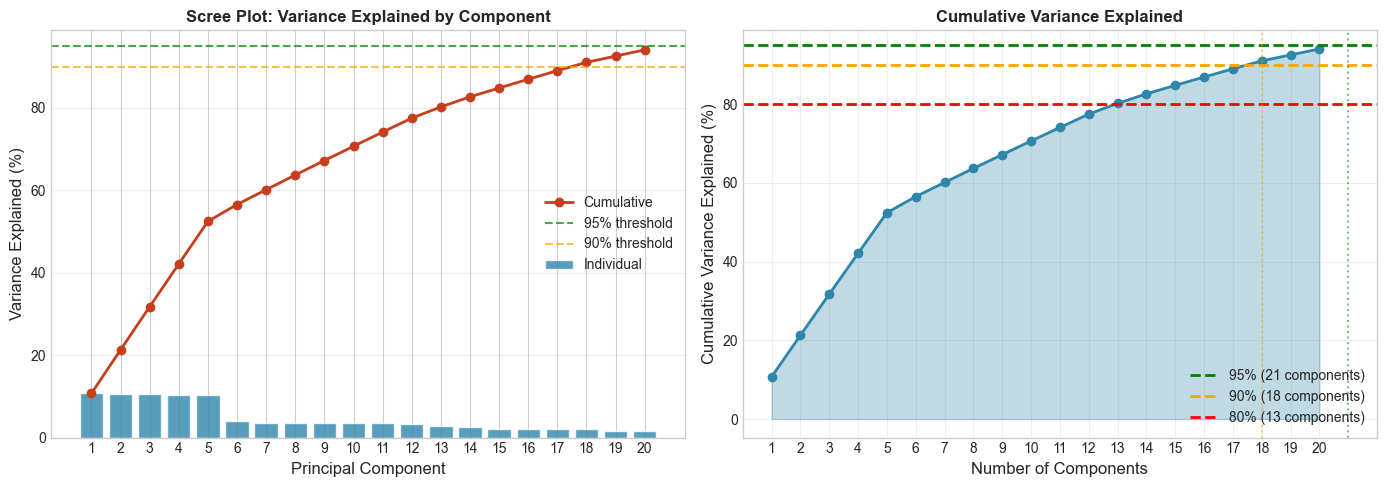

In [23]:
# Visualize PCA Variance Explained
print("=" * 60)
print("PCA VARIANCE VISUALIZATION")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scree Plot (Elbow Plot)
ax1 = axes[0]
n_components_to_show = min(20, len(pca_full.explained_variance_ratio_))
x_range = range(1, n_components_to_show + 1)
ax1.bar(x_range, pca_full.explained_variance_ratio_[:n_components_to_show] * 100, 
        color='#2E86AB', edgecolor='white', alpha=0.8, label='Individual')
ax1.plot(x_range, cumulative_variance[:n_components_to_show] * 100, 
         'o-', color='#C73E1D', linewidth=2, markersize=6, label='Cumulative')
ax1.axhline(y=95, color='green', linestyle='--', alpha=0.7, label='95% threshold')
ax1.axhline(y=90, color='orange', linestyle='--', alpha=0.7, label='90% threshold')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Variance Explained (%)')
ax1.set_title('Scree Plot: Variance Explained by Component', fontweight='bold', fontsize=12)
ax1.legend(loc='center right')
ax1.set_xticks(x_range)
ax1.grid(axis='y', alpha=0.3)

# Cumulative Variance Plot
ax2 = axes[1]
ax2.fill_between(x_range, cumulative_variance[:n_components_to_show] * 100, 
                 alpha=0.3, color='#2E86AB')
ax2.plot(x_range, cumulative_variance[:n_components_to_show] * 100, 
         'o-', color='#2E86AB', linewidth=2, markersize=6)
ax2.axhline(y=95, color='green', linestyle='--', linewidth=2, label=f'95% ({n_95} components)')
ax2.axhline(y=90, color='orange', linestyle='--', linewidth=2, label=f'90% ({n_90} components)')
ax2.axhline(y=80, color='red', linestyle='--', linewidth=2, label=f'80% ({n_80} components)')
ax2.axvline(x=n_95, color='green', linestyle=':', alpha=0.5)
ax2.axvline(x=n_90, color='orange', linestyle=':', alpha=0.5)
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Variance Explained (%)')
ax2.set_title('Cumulative Variance Explained', fontweight='bold', fontsize=12)
ax2.legend(loc='lower right')
ax2.set_xticks(x_range)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [24]:
# STEP 5: Interpret Principal Components (Loadings Analysis)
print("=" * 60)
print("STEP 5: PRINCIPAL COMPONENT INTERPRETATION")
print("=" * 60)

# Get loadings (component weights)
loadings = pca_full.components_

# Create loadings DataFrame
loadings_df = pd.DataFrame(
    loadings.T,
    index=all_feature_names,
    columns=[f'PC{i+1}' for i in range(loadings.shape[0])]
)

# Show loadings for first 5 principal components
n_pcs_to_show = min(5, loadings.shape[0])
print(f"\n📋 Component Loadings (First {n_pcs_to_show} PCs):")
print("(Loadings show how much each original feature contributes to each PC)")
display(loadings_df.iloc[:, :n_pcs_to_show].round(4))

# Identify top contributing features for each PC
print(f"\n📊 Top Contributing Features per Principal Component:")
print("=" * 60)

for i in range(n_pcs_to_show):
    pc_name = f'PC{i+1}'
    pc_loadings = loadings_df[pc_name].abs().sort_values(ascending=False)
    
    print(f"\n🔹 {pc_name} (Explains {pca_full.explained_variance_ratio_[i]*100:.2f}% variance)")
    print("-" * 40)
    
    # Top positive and negative loadings
    top_positive = loadings_df[pc_name].sort_values(ascending=False).head(3)
    top_negative = loadings_df[pc_name].sort_values(ascending=True).head(3)
    
    print("  Top Positive Loadings (feature increases → PC increases):")
    for feat, val in top_positive.items():
        print(f"    + {feat}: {val:.4f}")
    
    print("  Top Negative Loadings (feature increases → PC decreases):")
    for feat, val in top_negative.items():
        print(f"    - {feat}: {val:.4f}")


STEP 5: PRINCIPAL COMPONENT INTERPRETATION

📋 Component Loadings (First 5 PCs):
(Loadings show how much each original feature contributes to each PC)


,PC1,PC2,PC3,PC4,PC5
student_id,0.3709,0.6145,-0.3335,0.2810,-0.5419
age,0.3993,-0.5487,0.0308,0.7333,0.0119
study_hours,0.3454,0.4639,0.7041,0.1229,0.3919
class_attendance,0.5252,-0.3247,0.3178,-0.5343,-0.4816
sleep_hours,0.5546,0.0025,-0.5382,-0.2866,0.5657
gender_female,0.0039,-0.0089,-0.0062,-0.0006,-0.0018
gender_male,-0.0033,0.0137,0.0046,0.0010,-0.0012
gender_other,-0.0006,-0.0049,0.0015,-0.0004,0.0031
course_b.com,0.0028,0.0087,-0.0024,0.0023,-0.0058
course_b.sc,0.0035,0.0004,0.0006,-0.0033,0.0019



📊 Top Contributing Features per Principal Component:

🔹 PC1 (Explains 10.70% variance)
----------------------------------------
  Top Positive Loadings (feature increases → PC increases):
    + sleep_hours: 0.5546
    + class_attendance: 0.5252
    + age: 0.3993
  Top Negative Loadings (feature increases → PC decreases):
    - course_bca: -0.0069
    - sleep_quality_poor: -0.0060
    - internet_access_yes: -0.0041

🔹 PC2 (Explains 10.57% variance)
----------------------------------------
  Top Positive Loadings (feature increases → PC increases):
    + student_id: 0.6145
    + study_hours: 0.4639
    + gender_male: 0.0137
  Top Negative Loadings (feature increases → PC decreases):
    - age: -0.5487
    - class_attendance: -0.3247
    - sleep_quality_poor: -0.0094

🔹 PC3 (Explains 10.46% variance)
----------------------------------------
  Top Positive Loadings (feature increases → PC increases):
    + study_hours: 0.7041
    + class_attendance: 0.3178
    + age: 0.0308
  Top Negative

PCA LOADINGS HEATMAP


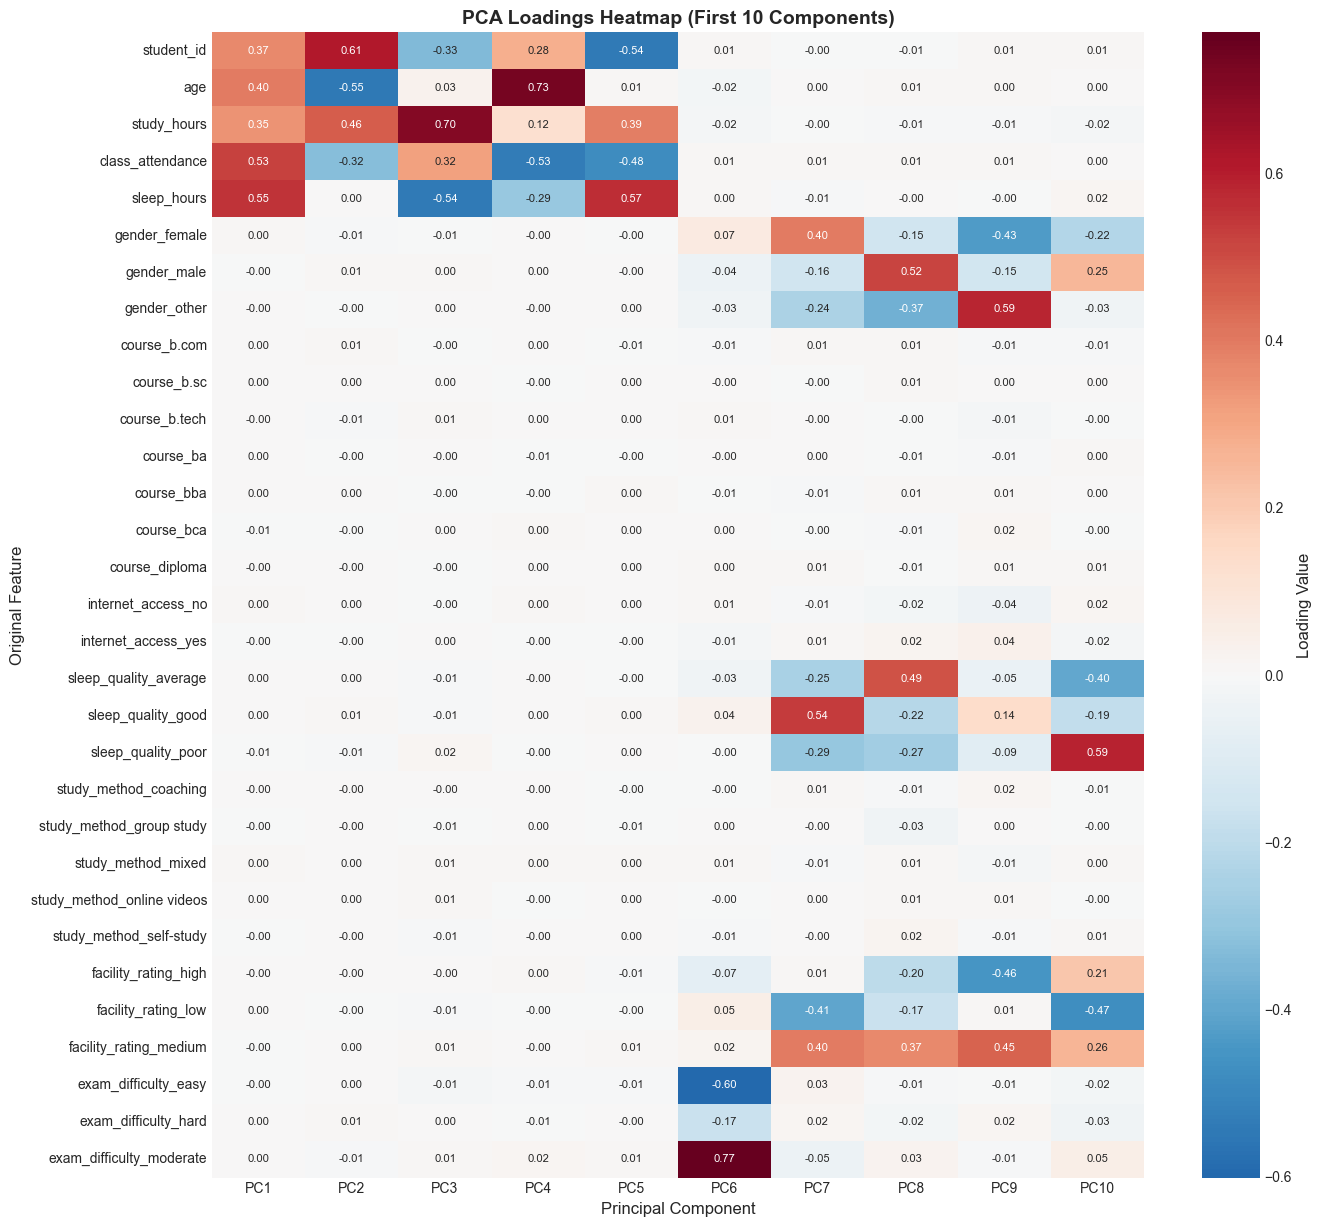

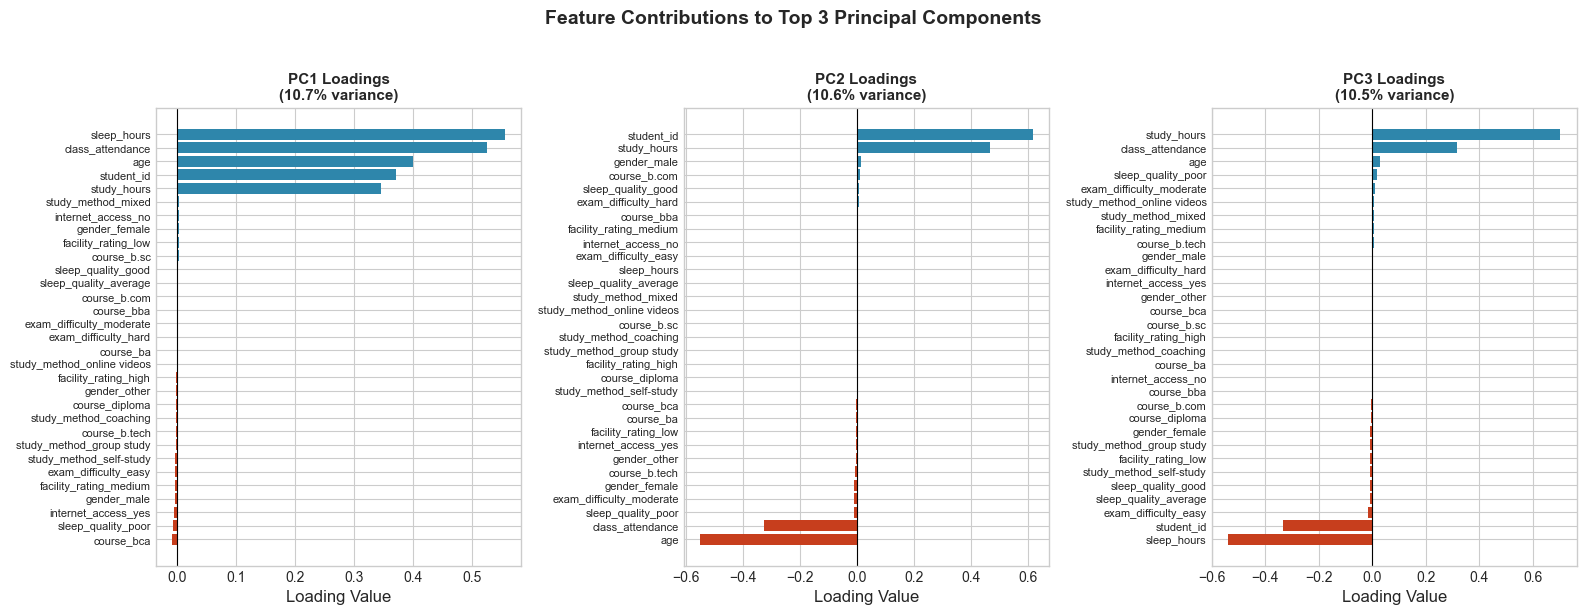

In [25]:
# Visualize PCA Loadings Heatmap
print("=" * 60)
print("PCA LOADINGS HEATMAP")
print("=" * 60)

# Create heatmap of loadings for first 10 PCs
n_pcs_heatmap = min(10, loadings.shape[0])
fig, ax = plt.subplots(figsize=(14, max(10, len(all_feature_names) * 0.4)))

sns.heatmap(loadings_df.iloc[:, :n_pcs_heatmap], 
            annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            ax=ax, cbar_kws={'label': 'Loading Value'},
            annot_kws={'size': 8})

ax.set_title(f'PCA Loadings Heatmap (First {n_pcs_heatmap} Components)', fontweight='bold', fontsize=14)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Original Feature')
plt.tight_layout()
plt.show()

# Bar plot of loadings for top 3 PCs
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

for i in range(min(3, loadings.shape[0])):
    ax = axes[i]
    pc_loadings = loadings_df[f'PC{i+1}'].sort_values()
    colors = ['#C73E1D' if x < 0 else '#2E86AB' for x in pc_loadings.values]
    
    ax.barh(range(len(pc_loadings)), pc_loadings.values, color=colors)
    ax.set_yticks(range(len(pc_loadings)))
    ax.set_yticklabels(pc_loadings.index, fontsize=8)
    ax.axvline(x=0, color='black', linewidth=0.8)
    ax.set_xlabel('Loading Value')
    ax.set_title(f'PC{i+1} Loadings\n({pca_full.explained_variance_ratio_[i]*100:.1f}% variance)', 
                 fontweight='bold', fontsize=11)

plt.suptitle('Feature Contributions to Top 3 Principal Components', fontweight='bold', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


2D PCA VISUALIZATION


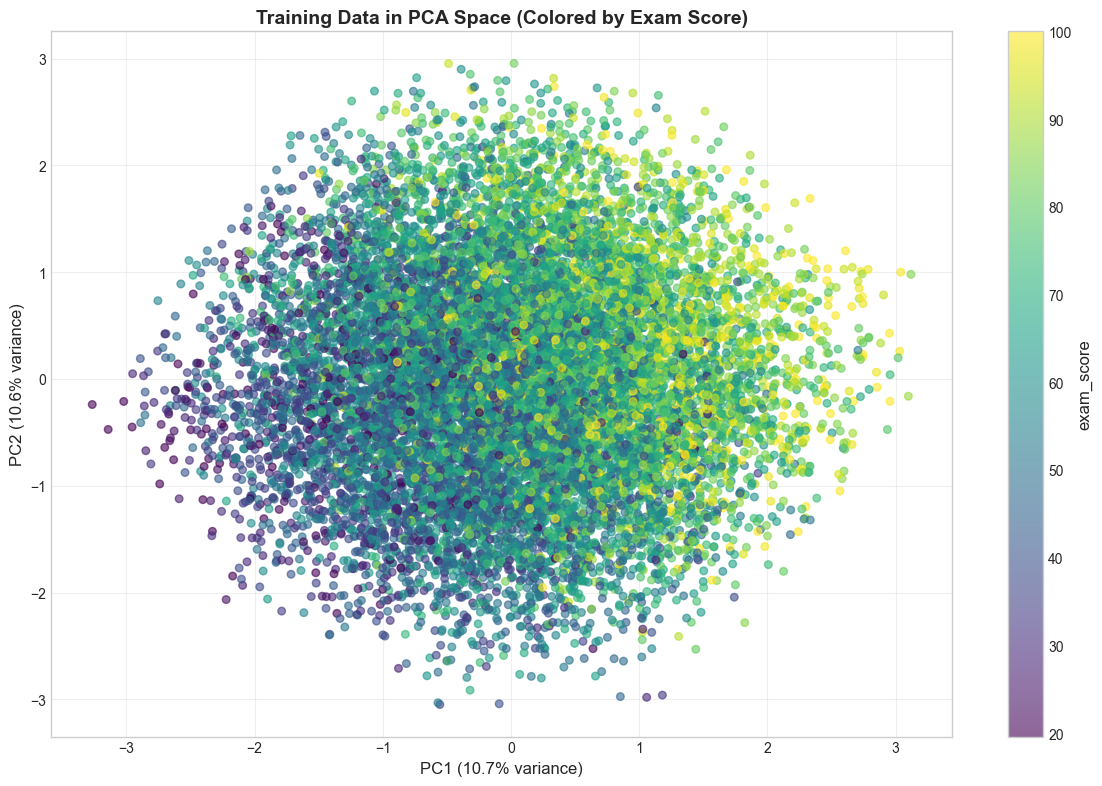

In [26]:
# 2D PCA Visualization (PC1 vs PC2)
print("=" * 60)
print("2D PCA VISUALIZATION")
print("=" * 60)

# Transform data to PCA space (first 2 components for visualization)
X_train_pca_2d = pca_full.transform(X_train_processed)[:, :2]

fig, ax = plt.subplots(figsize=(12, 8))

# Create scatter plot colored by target variable
scatter = ax.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], 
                     c=y_train.values, cmap='viridis', alpha=0.6, s=30)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(f'{target_col}', fontsize=12)

ax.set_xlabel(f'PC1 ({pca_full.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
ax.set_ylabel(f'PC2 ({pca_full.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
ax.set_title('Training Data in PCA Space (Colored by Exam Score)', fontweight='bold', fontsize=14)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# PC1 vs PC2 biplot with feature vectors (if not too many features)
if len(all_feature_names) <= 30:
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Plot data points
    scatter = ax.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], 
                        c=y_train.values, cmap='viridis', alpha=0.3, s=20)
    
    # Plot feature vectors (loadings)
    scale_factor = 3  # Scale for visibility
    for i, feature in enumerate(all_feature_names):
        ax.arrow(0, 0, 
                loadings[0, i] * scale_factor, 
                loadings[1, i] * scale_factor,
                head_width=0.1, head_length=0.05, fc='red', ec='red', alpha=0.7)
        ax.text(loadings[0, i] * scale_factor * 1.15, 
               loadings[1, i] * scale_factor * 1.15,
               feature, fontsize=8, ha='center', va='center')
    
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(f'{target_col}', fontsize=12)
    
    ax.set_xlabel(f'PC1 ({pca_full.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
    ax.set_ylabel(f'PC2 ({pca_full.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
    ax.set_title('PCA Biplot: Data Points + Feature Vectors', fontweight='bold', fontsize=14)
    ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
    ax.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()


In [27]:
# Create PCA-transformed datasets for modeling (using 95% variance threshold)
print("=" * 60)
print("FINAL DATA PREPARATION SUMMARY")
print("=" * 60)

# Use PCA with n_95 components for modeling
pca_model = PCA(n_components=n_95)
pca_model.fit(X_train_processed)

# Transform all datasets
X_train_pca = pca_model.transform(X_train_processed)
X_val_pca = pca_model.transform(X_val_processed)
X_test_pca = pca_model.transform(X_test_processed)
X_website_pca = pca_model.transform(X_website_processed)

print(f"\n✅ PCA Transformation Complete!")
print(f"   Original features: {X_train_processed.shape[1]}")
print(f"   PCA components (95% variance): {n_95}")
print(f"   Dimensionality reduction: {(1 - n_95/X_train_processed.shape[1])*100:.1f}%")

print(f"\n📊 Final Dataset Shapes:")
print(f"   ├── X_train_pca:   {X_train_pca.shape}")
print(f"   ├── X_val_pca:     {X_val_pca.shape}")
print(f"   ├── X_test_pca:    {X_test_pca.shape}")
print(f"   └── X_website_pca: {X_website_pca.shape}")

print(f"\n📊 Available Data Objects for Model Training:")
print("-" * 60)
print("WITHOUT PCA (preprocessed):")
print(f"   • X_train_processed, y_train  - Training data")
print(f"   • X_val_processed, y_val      - Validation data")
print(f"   • X_test_processed, y_test    - Test data")
print(f"   • X_website_processed, y_website - Website holdout")
print("\nWITH PCA (dimensionality reduced):")
print(f"   • X_train_pca, y_train  - Training data ({n_95} components)")
print(f"   • X_val_pca, y_val      - Validation data")
print(f"   • X_test_pca, y_test    - Test data")
print(f"   • X_website_pca, y_website - Website holdout")

print("\n" + "=" * 60)
print("DATA PREPARATION COMPLETE - READY FOR MODEL TRAINING")
print("=" * 60)


FINAL DATA PREPARATION SUMMARY

✅ PCA Transformation Complete!
   Original features: 31
   PCA components (95% variance): 21
   Dimensionality reduction: 32.3%

📊 Final Dataset Shapes:
   ├── X_train_pca:   (13303, 21)
   ├── X_val_pca:     (3797, 21)
   ├── X_test_pca:    (1900, 21)
   └── X_website_pca: (1000, 21)

📊 Available Data Objects for Model Training:
------------------------------------------------------------
WITHOUT PCA (preprocessed):
   • X_train_processed, y_train  - Training data
   • X_val_processed, y_val      - Validation data
   • X_test_processed, y_test    - Test data
   • X_website_processed, y_website - Website holdout

WITH PCA (dimensionality reduced):
   • X_train_pca, y_train  - Training data (21 components)
   • X_val_pca, y_val      - Validation data
   • X_test_pca, y_test    - Test data
   • X_website_pca, y_website - Website holdout

DATA PREPARATION COMPLETE - READY FOR MODEL TRAINING


DATA SPLIT VISUALIZATION


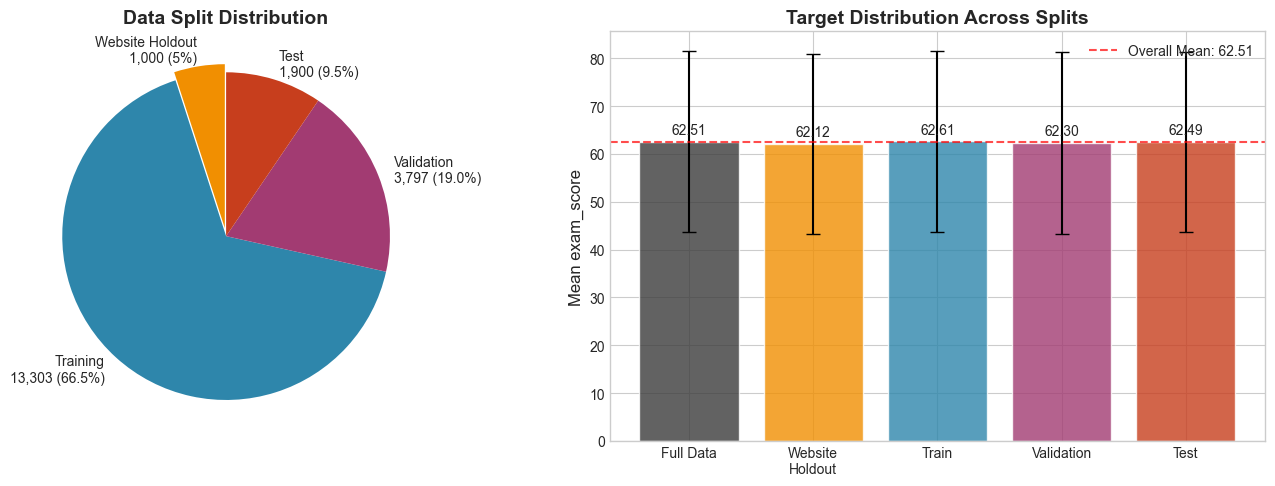


📊 Target Variable Distribution Across Splits:


,Split,N Samples,Mean,Std,Min,Max
1,Website Holdout,1000,62.12,18.79,19.6,100.0
2,Training,13303,62.61,18.92,19.6,100.0
3,Validation,3797,62.30,18.98,19.6,100.0
4,Test,1900,62.49,18.73,19.6,100.0


In [28]:
# Visualize the data splits
print("=" * 60)
print("DATA SPLIT VISUALIZATION")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart of overall splits
ax1 = axes[0]
split_sizes = [len(X_website), len(X_train), len(X_val), len(X_test)]
split_labels = [f'Website Holdout\n{len(X_website):,} (5%)', 
                f'Training\n{len(X_train):,} ({len(X_train)/len(X)*100:.1f}%)',
                f'Validation\n{len(X_val):,} ({len(X_val)/len(X)*100:.1f}%)',
                f'Test\n{len(X_test):,} ({len(X_test)/len(X)*100:.1f}%)']
colors_pie = ['#F18F01', '#2E86AB', '#A23B72', '#C73E1D']
explode = (0.05, 0, 0, 0)  # Highlight website holdout

wedges, texts, autotexts = ax1.pie(split_sizes, labels=split_labels, colors=colors_pie,
                                    explode=explode, autopct='', startangle=90)
ax1.set_title('Data Split Distribution', fontweight='bold', fontsize=14)

# Bar chart comparing target distribution across splits
ax2 = axes[1]
split_names = ['Full Data', 'Website\nHoldout', 'Train', 'Validation', 'Test']
split_means = [y.mean(), y_website.mean(), y_train.mean(), y_val.mean(), y_test.mean()]
split_stds = [y.std(), y_website.std(), y_train.std(), y_val.std(), y_test.std()]
bar_colors = ['#3B3B3B', '#F18F01', '#2E86AB', '#A23B72', '#C73E1D']

bars = ax2.bar(split_names, split_means, color=bar_colors, edgecolor='white', alpha=0.8)
ax2.errorbar(split_names, split_means, yerr=split_stds, fmt='none', color='black', capsize=5)
ax2.set_ylabel(f'Mean {target_col}')
ax2.set_title(f'Target Distribution Across Splits', fontweight='bold', fontsize=14)
ax2.axhline(y.mean(), color='red', linestyle='--', alpha=0.7, label=f'Overall Mean: {y.mean():.2f}')
ax2.legend()

for bar, mean_val in zip(bars, split_means):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{mean_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Summary statistics table
print("\n📊 Target Variable Distribution Across Splits:")
split_summary = pd.DataFrame({
    'Split': ['Website Holdout', 'Training', 'Validation', 'Test'],
    'N Samples': [len(y_website), len(y_train), len(y_val), len(y_test)],
    'Mean': [y_website.mean(), y_train.mean(), y_val.mean(), y_test.mean()],
    'Std': [y_website.std(), y_train.std(), y_val.std(), y_test.std()],
    'Min': [y_website.min(), y_train.min(), y_val.min(), y_test.min()],
    'Max': [y_website.max(), y_train.max(), y_val.max(), y_test.max()]
}).round(2)
split_summary.index = range(1, len(split_summary) + 1)
display(split_summary)
